Hello! Welcome to the autocalibration pipeline for SLAB superconducting qubits. This autocalibration code will run the following experiments in this order !!!!!!. The data will them be saved automatically to the configuration file <code>autocalibrate_cfg.yml</code> 

Initializations

In [1]:
# %matplotlib widget
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
import scipy as sp
import json
import cProfile
import re 

from scipy.fft import fft, fftfreq

from slab.instruments.instrumentmanager import InstrumentManager
#from slab.instruments.instrumenttypes import Instrument
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from datetime import datetime
import experiments as meas
import autocalib_config as cfg

import yaml
import config

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

expt_path='C:\\_Data\\LLqub2\\Tuning_2024_05_07\\'
print('Data will be stored in', expt_path)

import importlib 
importlib.reload(meas)

# Results config file:
cfg_file = 'autocalibration_cfg.yml'
#cfg_path = os.getcwd() + '\\' + cfg_file
#print('Results config will be', cfg_path)
cfg_path = expt_path + cfg_file
cfg_file = cfg_path 
auto_cfg = config.load(cfg_path)

auto_cfg

# Connect to instruments 
im = InstrumentManager(ns_address='192.168.137.1') # SLAC lab

soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)
print(auto_cfg['aliases']['soc'])
print(soc.description())

num_qubits = 6

Could not import QickSoc: No module named 'pynq'
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load labbrick
Could not load Autonics TM4 Driver
imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.crud
imported experiments.single_qubit.DONOTUSE_ramsey_ef
imported experiments.single_qubit.DONOTUSE_randbench
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_ef_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy_test
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.SingleRB
imported experiments.single_qub

# Set the configuration file 

Note: make sure you set your ADC/DAC channels correctly. This code does not automatically fill in the ADC/DAC into your configuration file, so you should check yourself to make sure these values are correct. 

# Time of Flight (TOF)

TOF measures the time it takes for the signal to run through the wires. It will give us the time in clock ticks that we should wait to make a measurements 

5.016411542892456
215 307
readout freq 0 +/- 7098.818504483798


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00006_adc_trig_offset_calibration_qubit0.h5


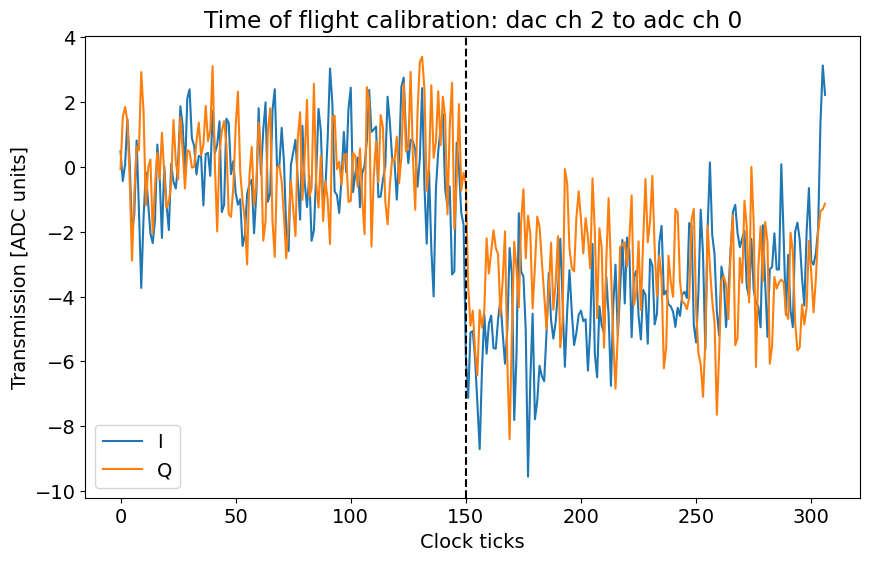

In [2]:
i = 0
tof = cfg.make_tof(soc, expt_path, cfg_path, i)
tof.go(analyze=False, display=False, progress=True, save=True)
tof.display(adc_trig_offset=150) 

# Coarse Resonator Spectroscopy 

Run resonator spectroscopy for all resonators by choosing a large frequency scan to look over. The scan will then find the different resonators and fill in the config file with their respective frequencies. In the autocalibration, there will be a finer sweep of each resonator to more accurately find its frequency. The frequencies are saved in <code>auto_cfg.device.readout.frequency</code>

5.0001161098480225


  0%|          | 0/5000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00018_resonator_spectroscopy_coarse.h5
number of peaks: 4


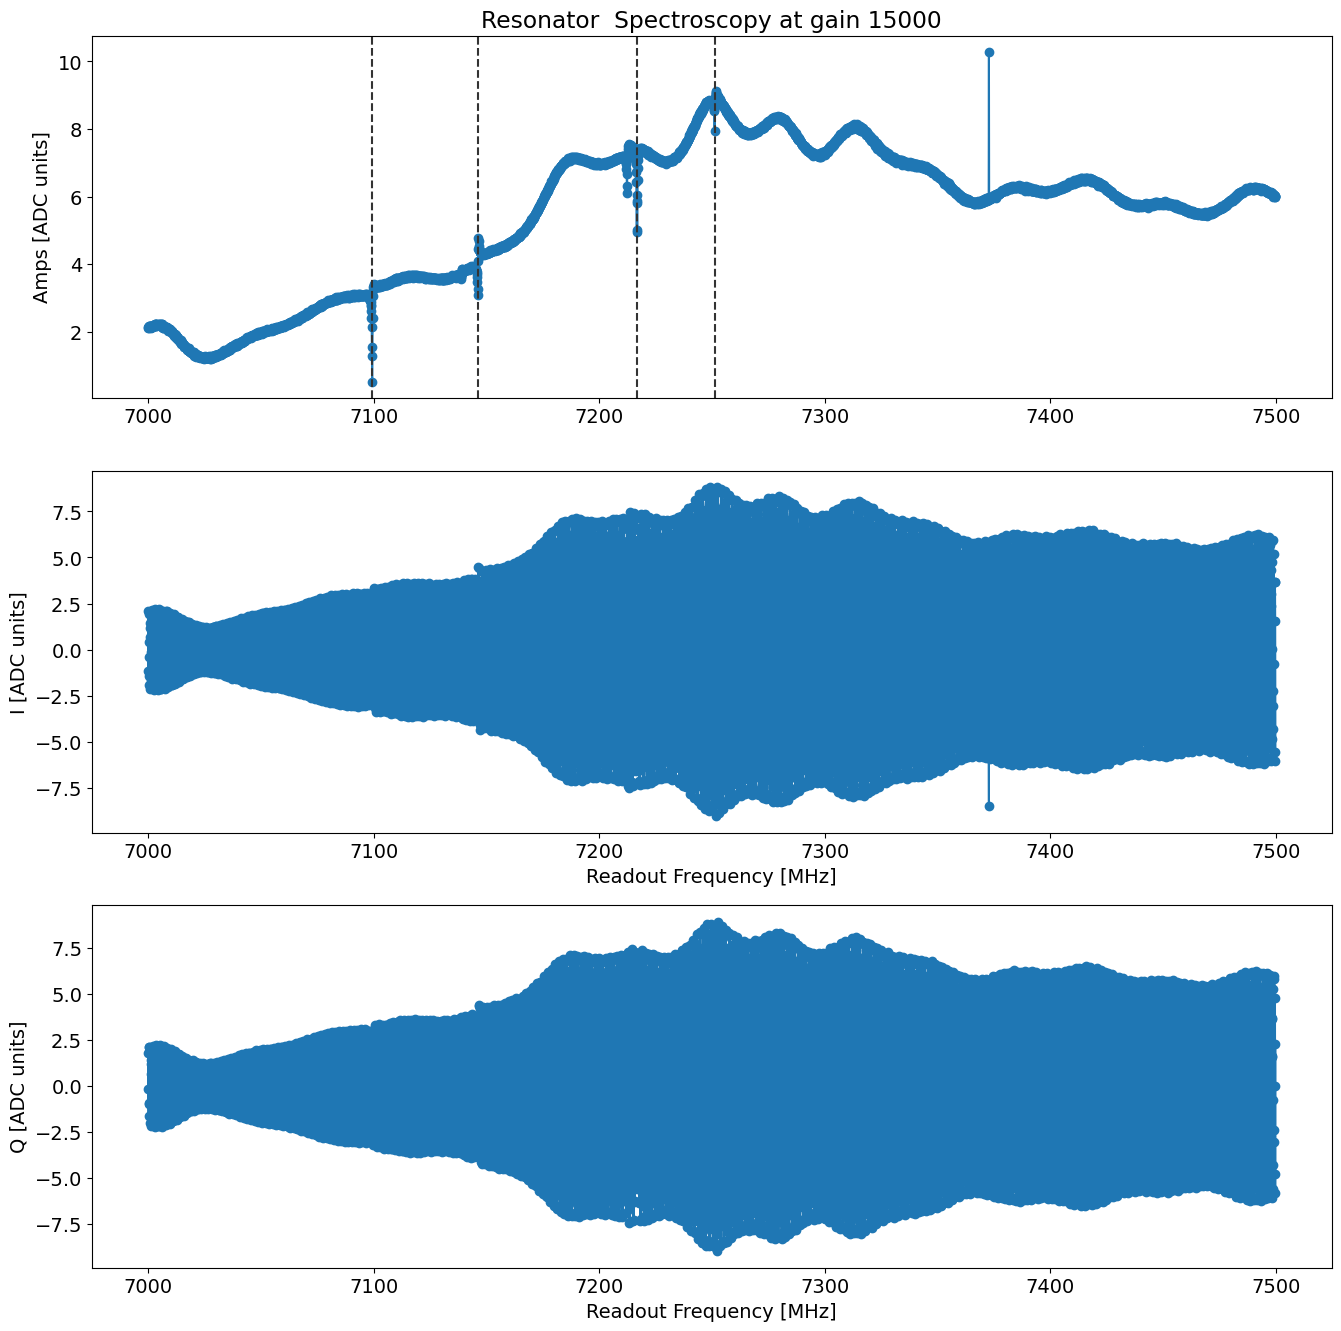

In [9]:
rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, start=7000, span=500, reps=2000, npts=5000)
rspec.go(analyze=False, display=False, progress=True, save=True)
rspec.analyze(fit=False, coarse_scan = True)
rspec.display(fit=False, coarse_scan = True)
res_values = rspec.data['coarse_peaks']

number of peaks: 8


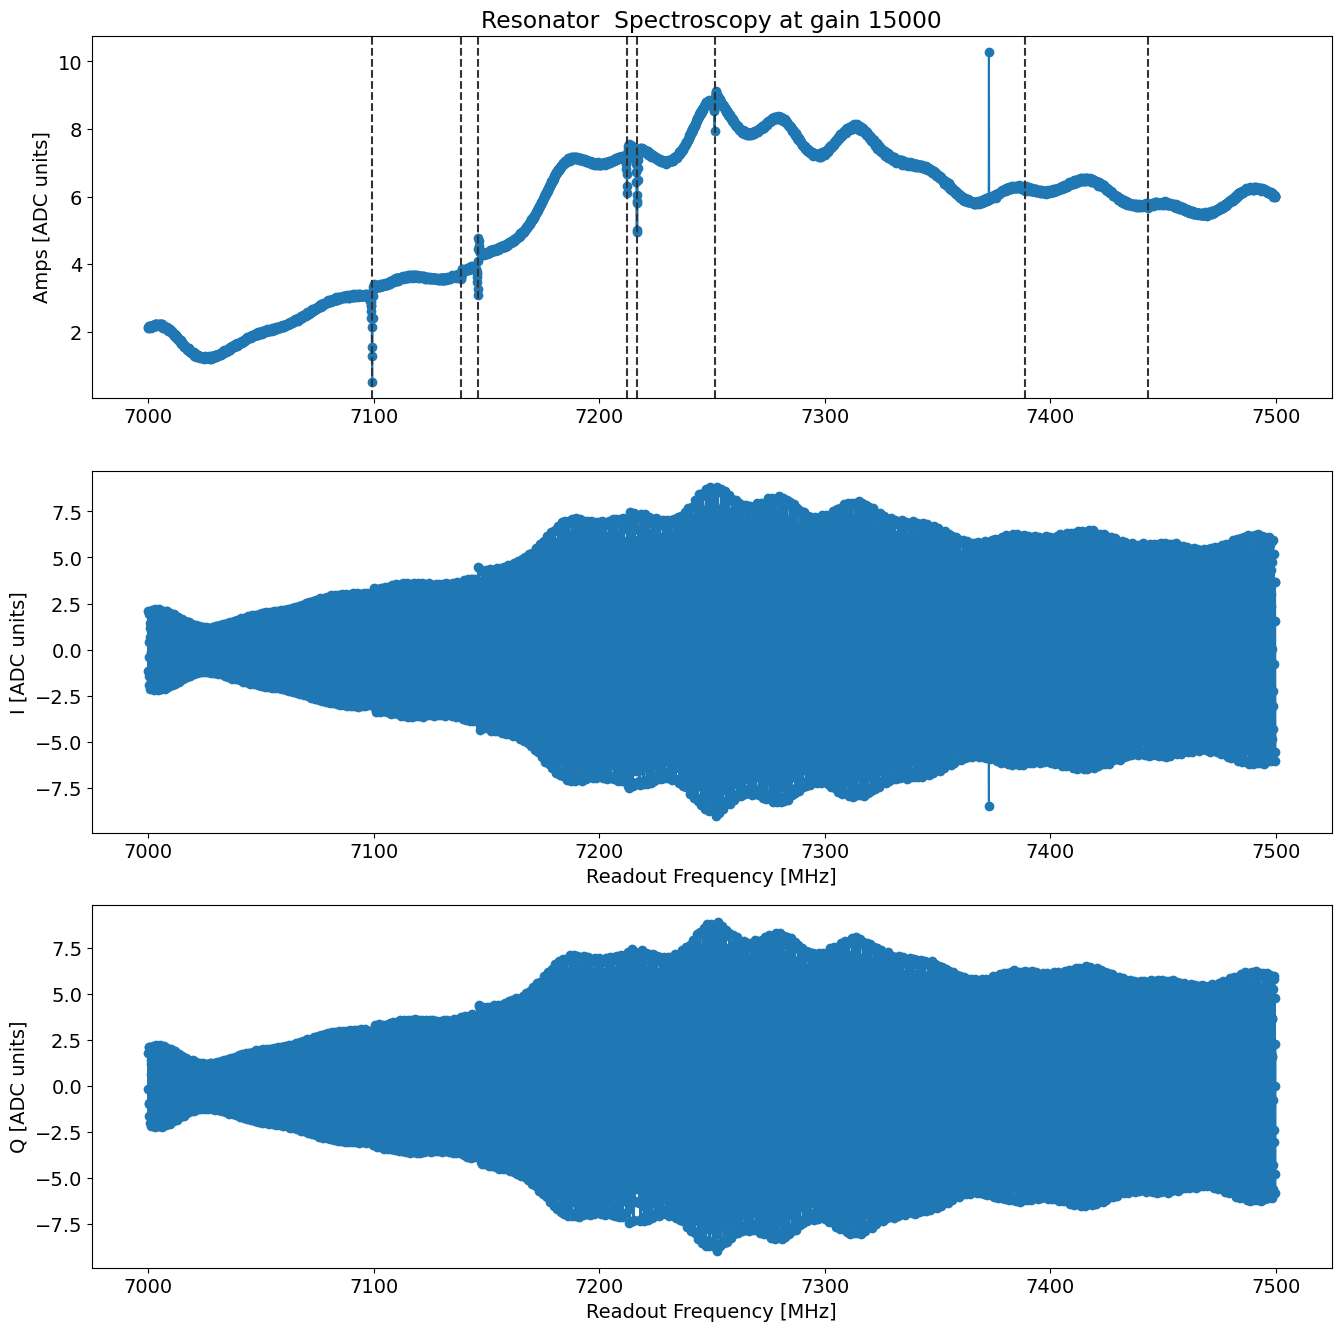

In [13]:
# Optional, play around with the finding peaks: 
rspec.analyze(fit=False, coarse_scan = True)
rspec.display(fit=False, coarse_scan = True)
res_values = rspec.data['coarse_peaks']

5.022494554519653


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res0.h5


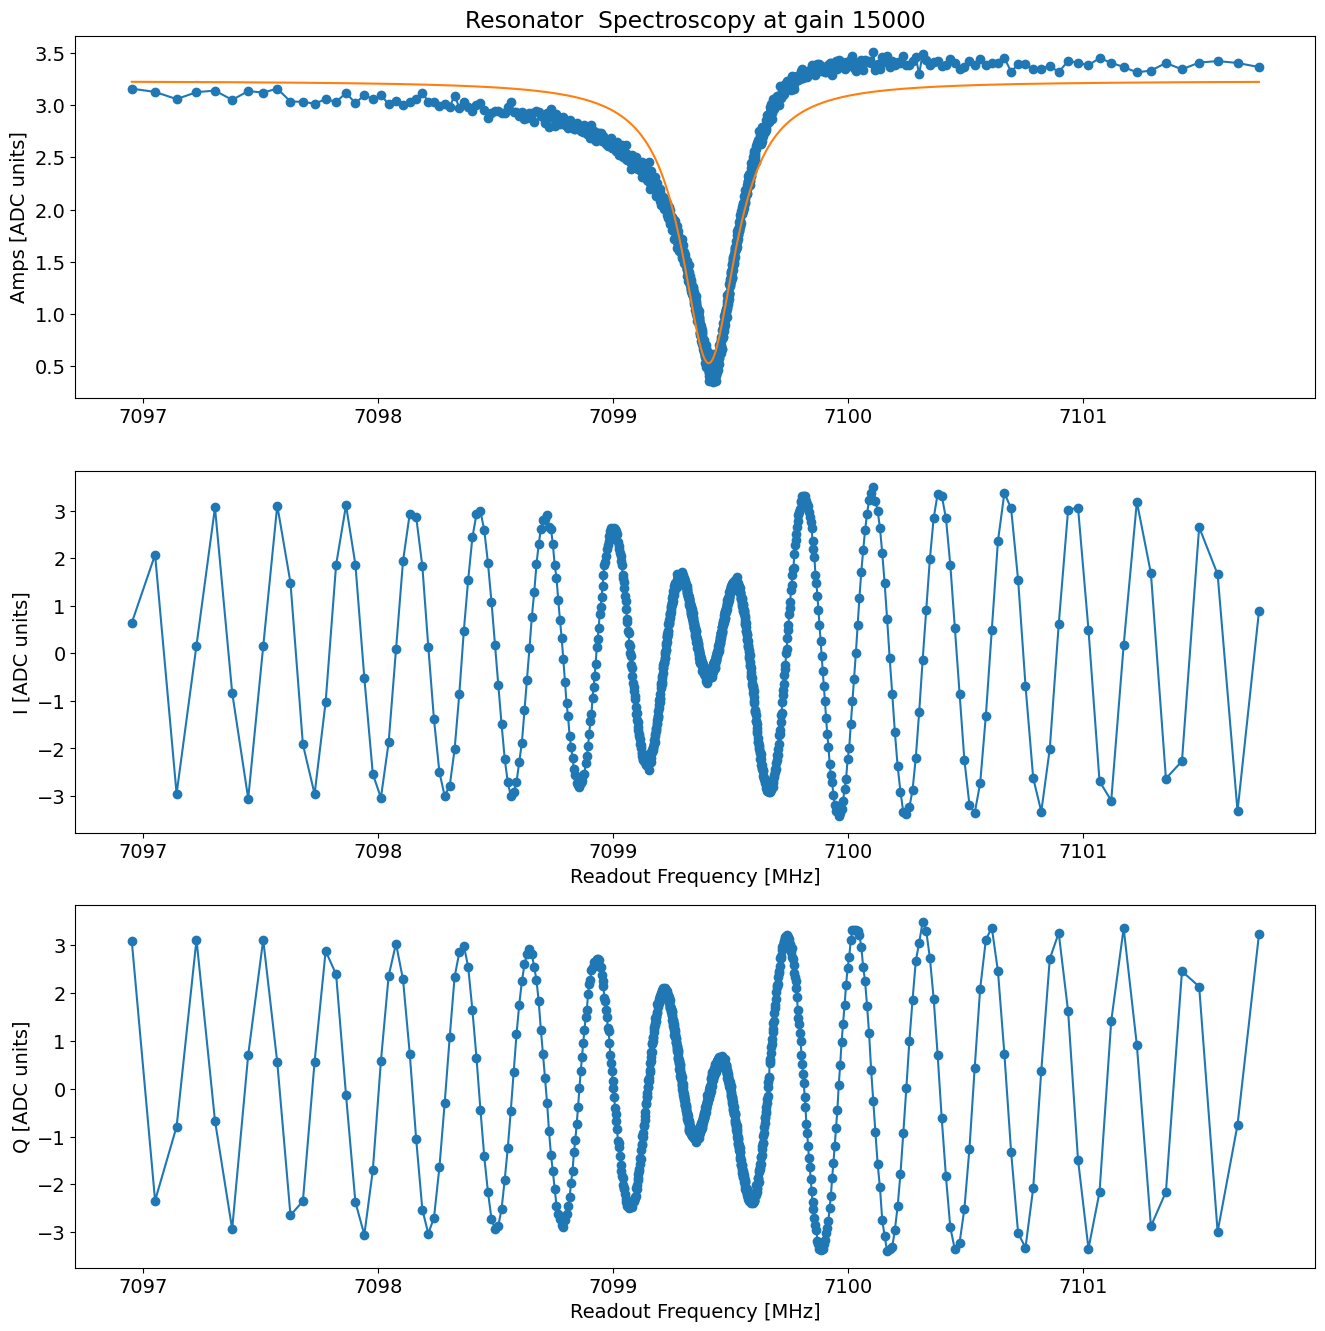

*Set cfg resonator 0 frequency to 7099.40705870269 from 7099.407314972352*
*Set cfg resonator 0 kappa to 0.2802765245445858 from 0*
5.027275800704956


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res1.h5


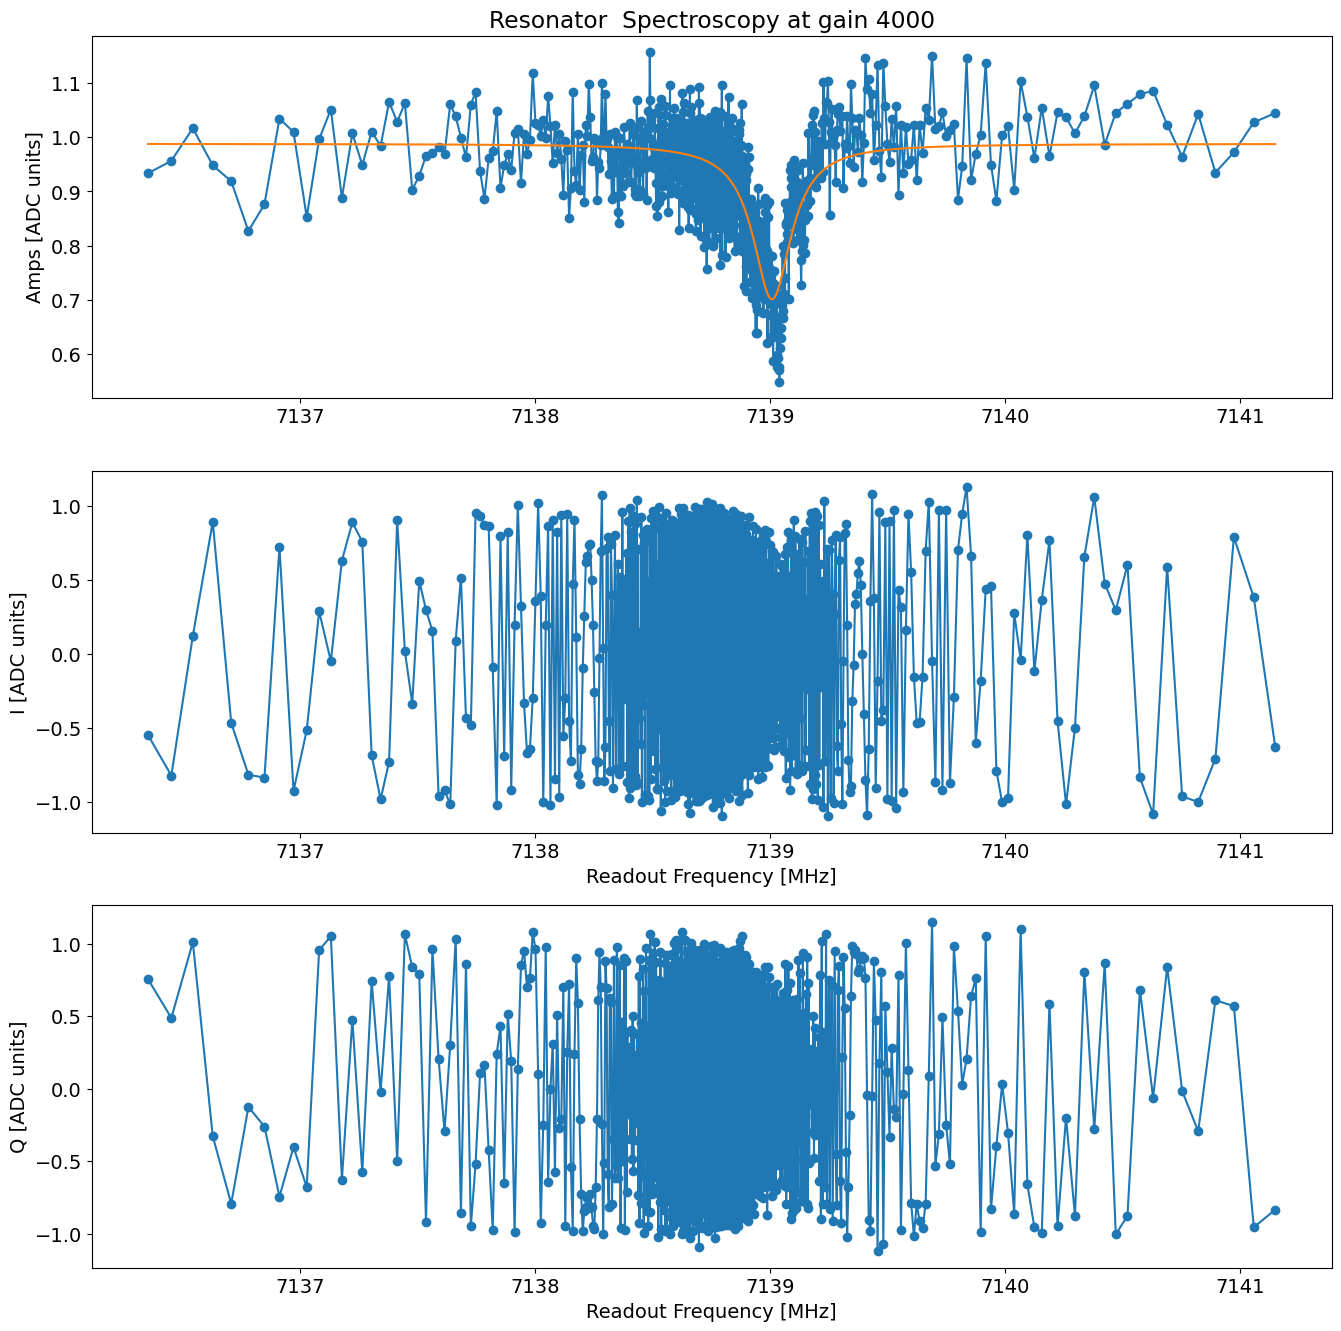

*Set cfg resonator 1 frequency to 7139.0071872378885 from 7137.582485492751*
*Set cfg resonator 1 kappa to 0.1972735864074821 from 0*
5.018458127975464


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res2.h5


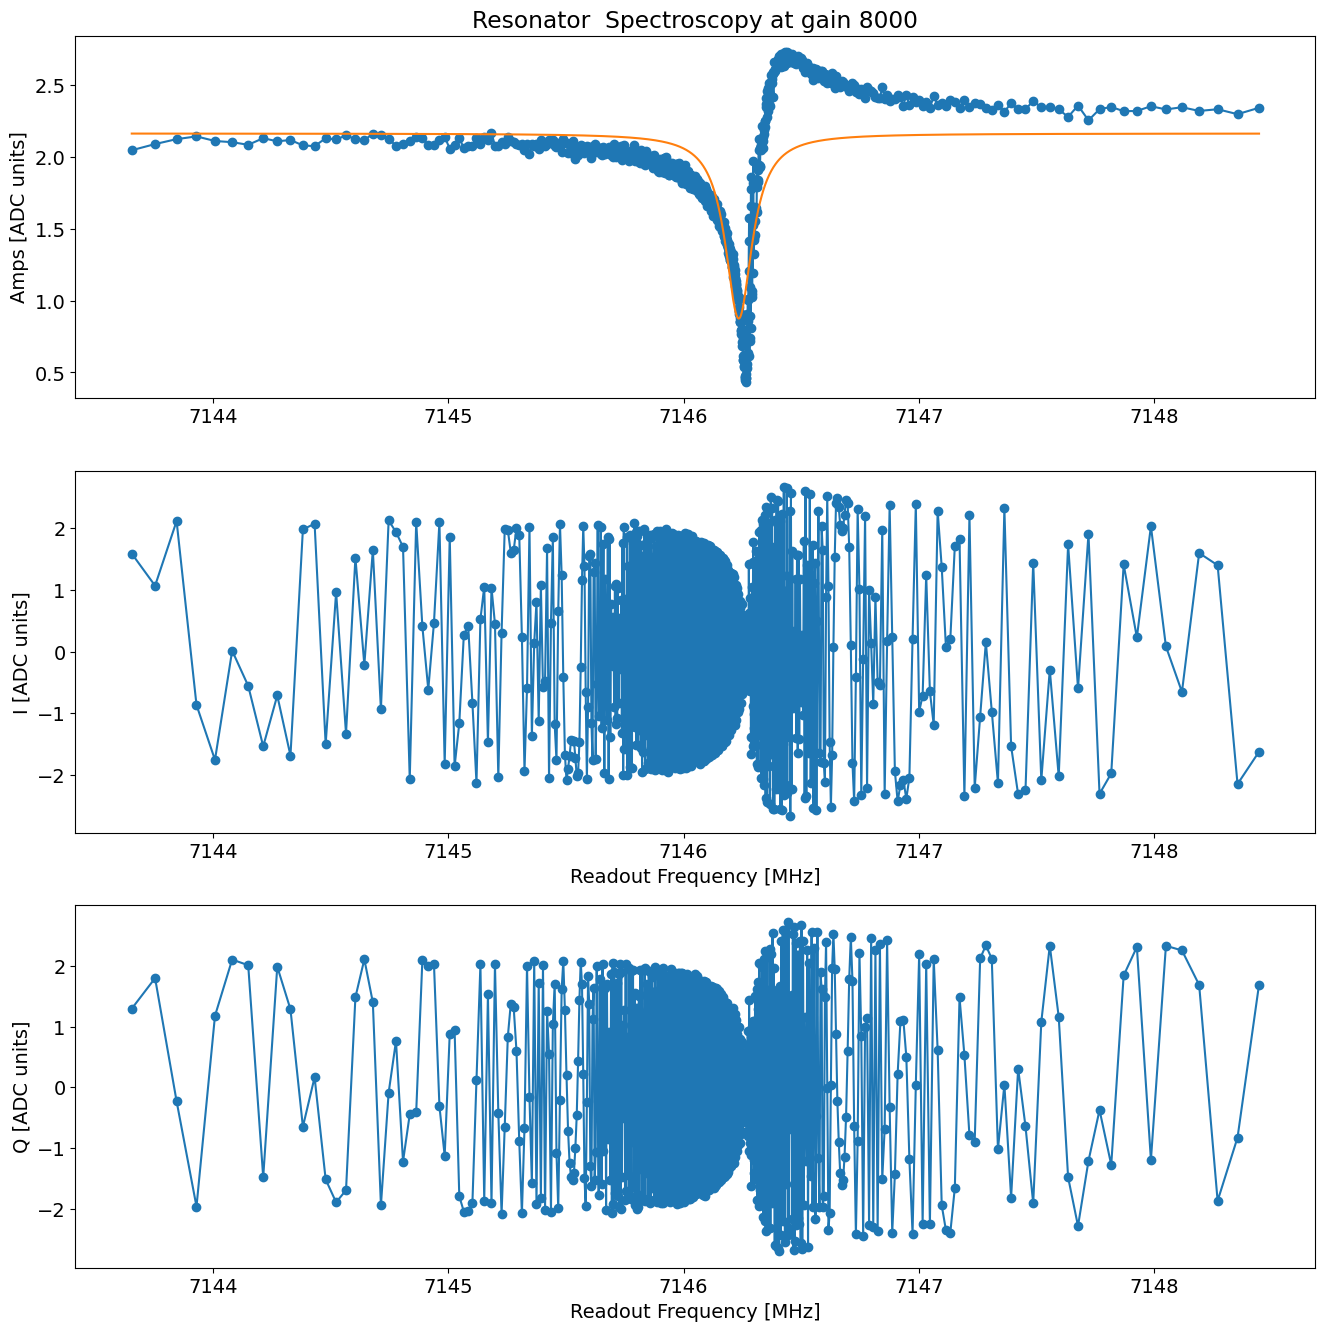

*Set cfg resonator 2 frequency to 7146.234620965896 from 7145.514833831296*
*Set cfg resonator 2 kappa to 0.13947469297542384 from 0*
5.026907682418823


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res3.h5


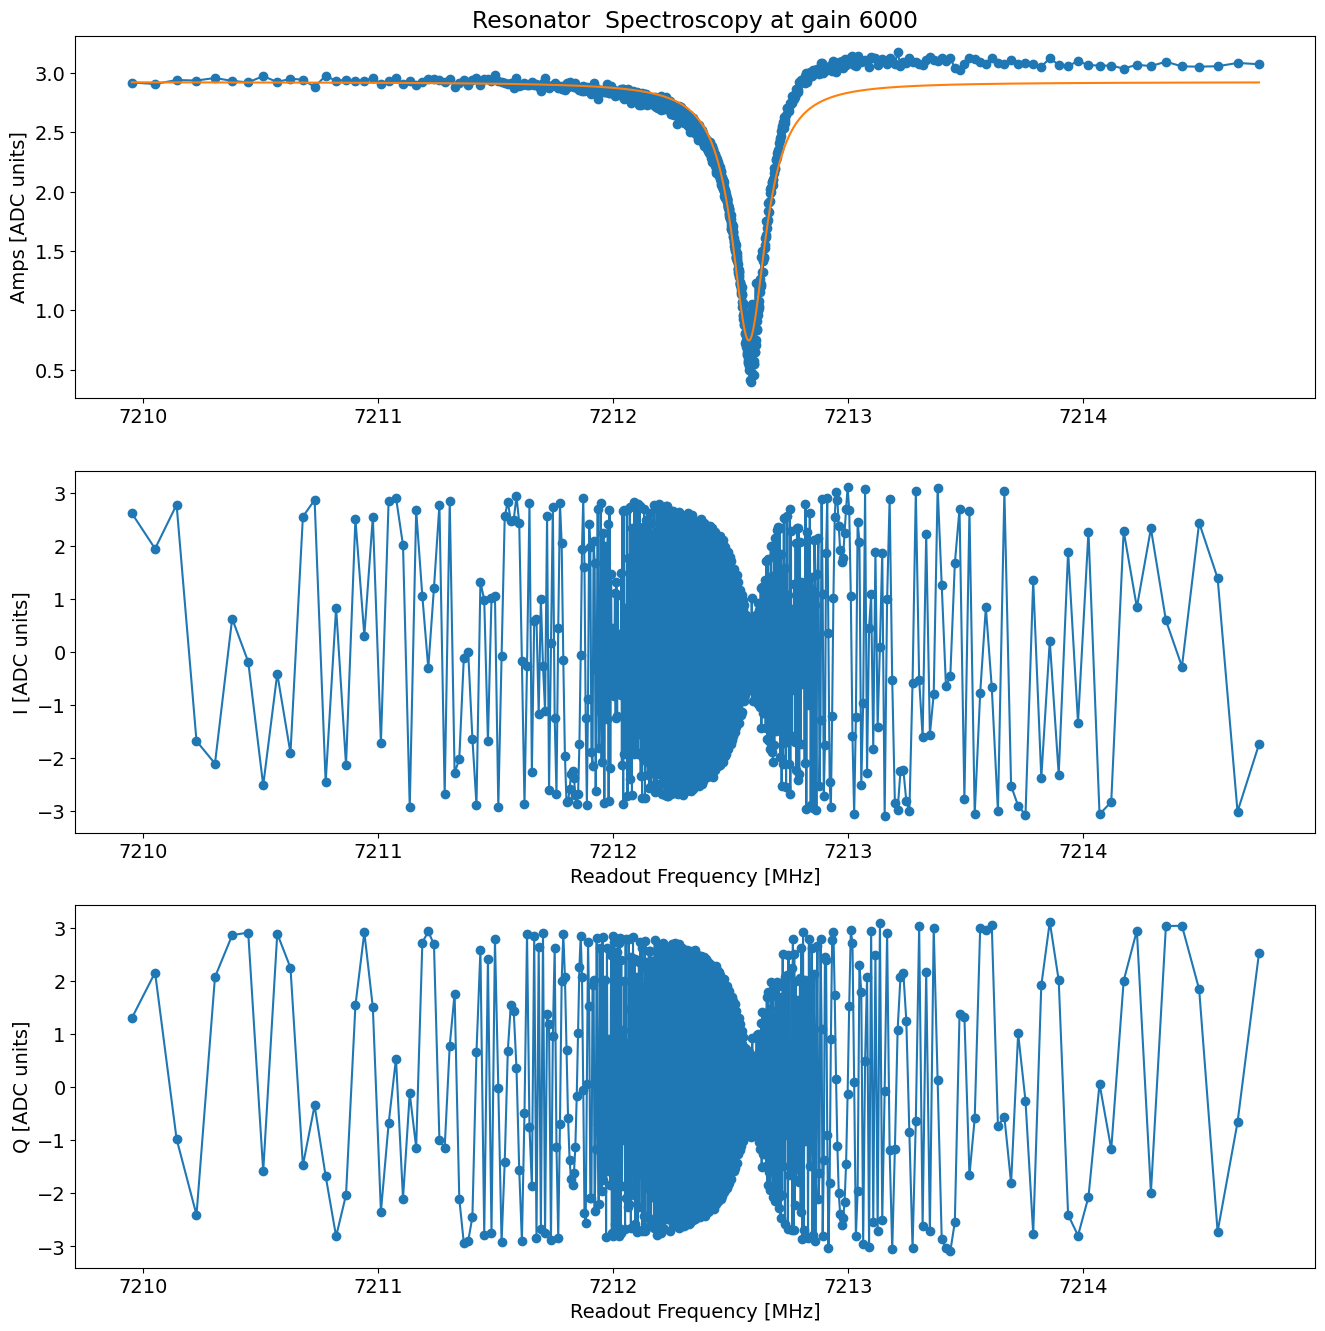

*Set cfg resonator 3 frequency to 7212.577818704508 from 7210.194260332338*
*Set cfg resonator 3 kappa to 0.1755192643974948 from 0*
5.022103309631348


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res4.h5


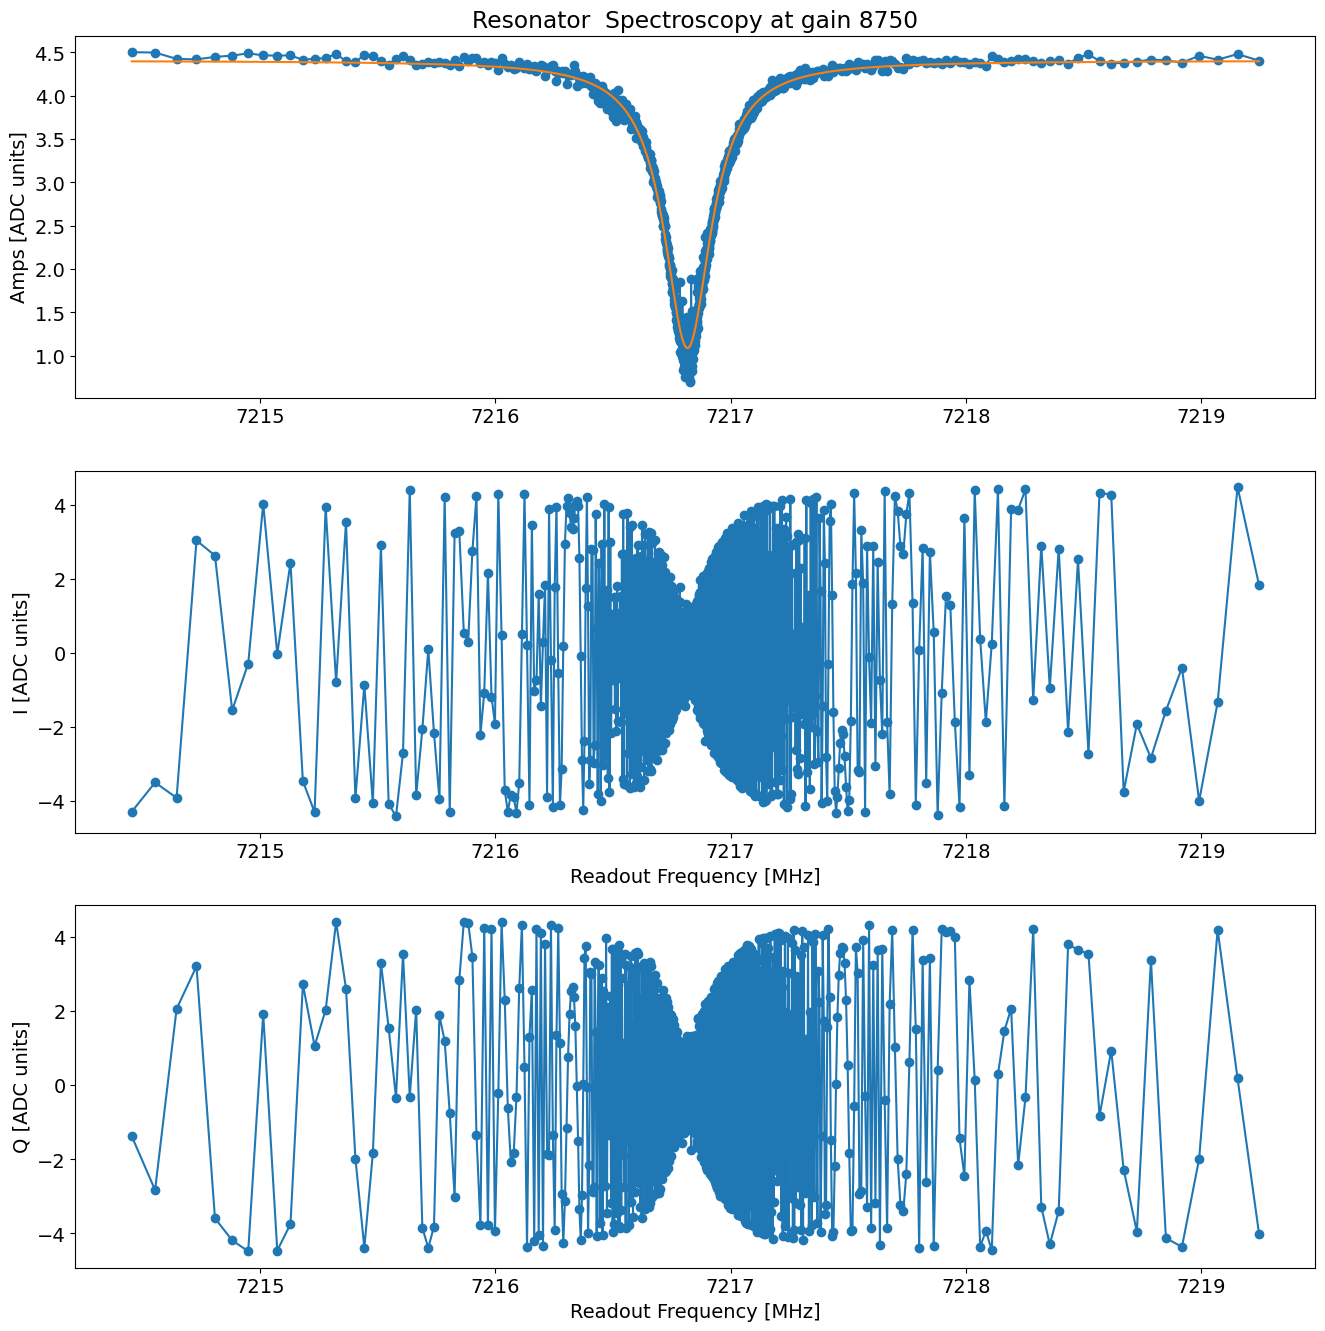

*Set cfg resonator 4 frequency to 7216.816821234878 from 7216.068856495034*
*Set cfg resonator 4 kappa to 0.24201131798242603 from 0*
5.024382829666138


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res5.h5


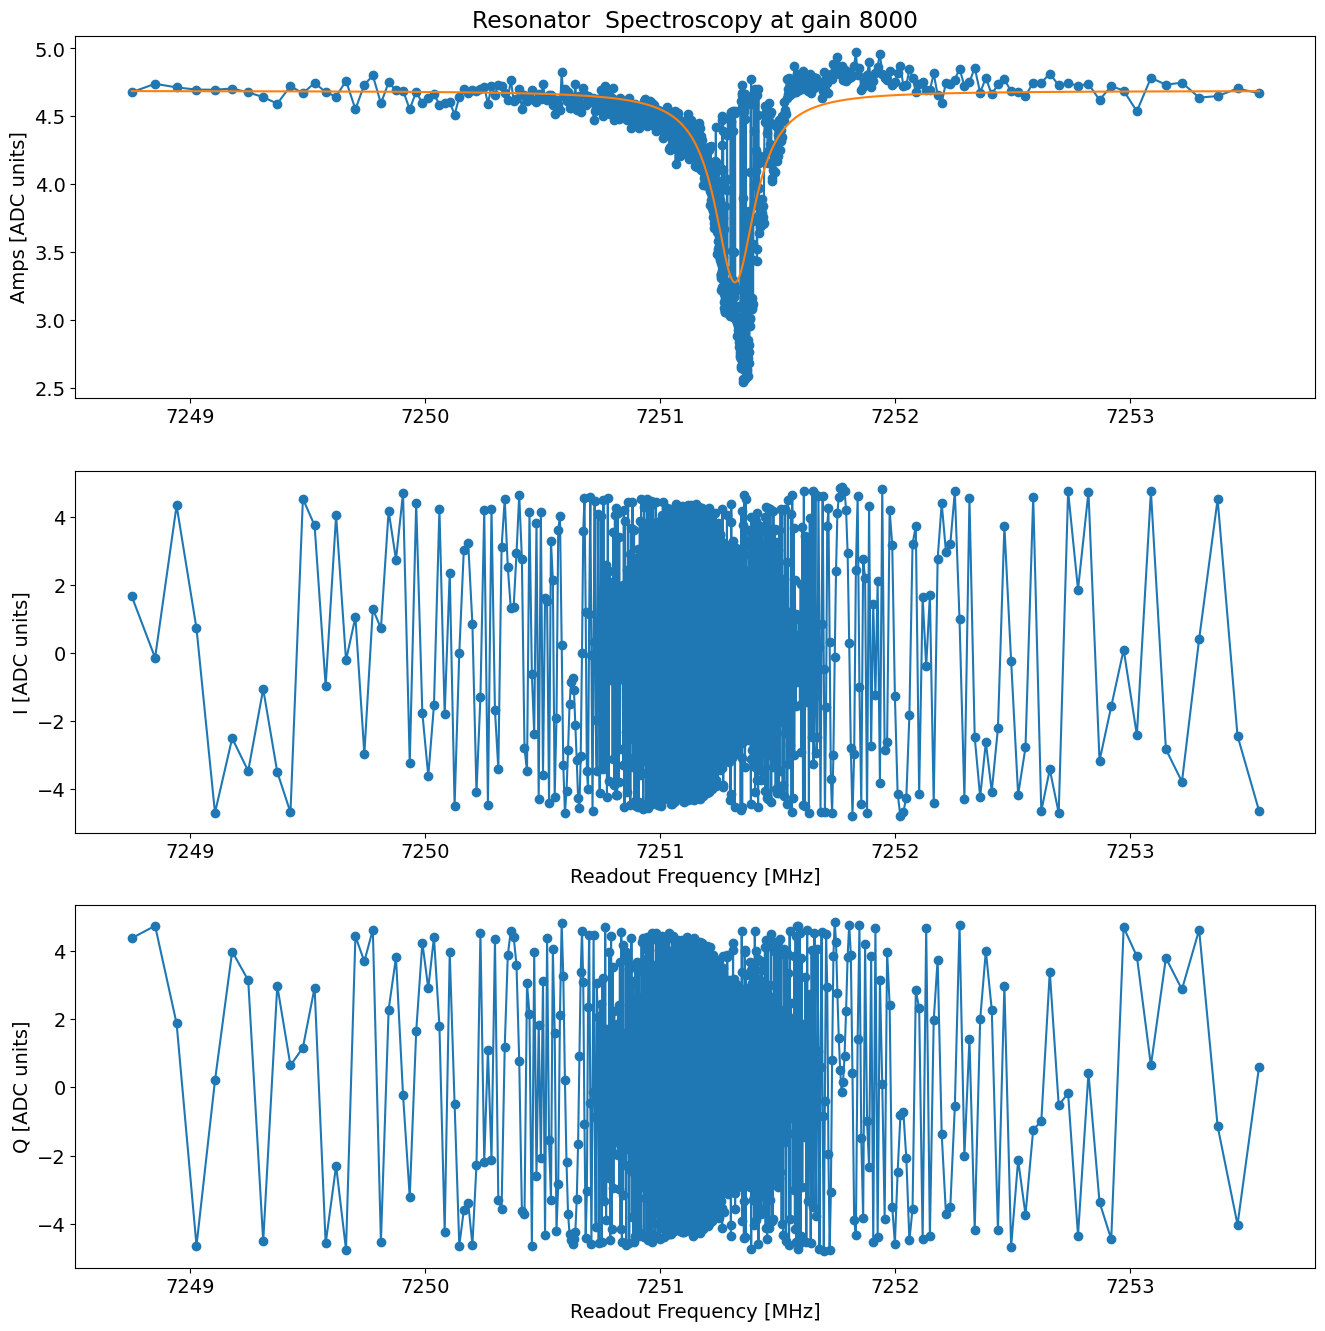

*Set cfg resonator 5 frequency to 7251.318636637718 from 7249.8754434795765*
*Set cfg resonator 5 kappa to 0.20813419290775922 from 0.21144869329929125*
4.995146036148071


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res6.h5


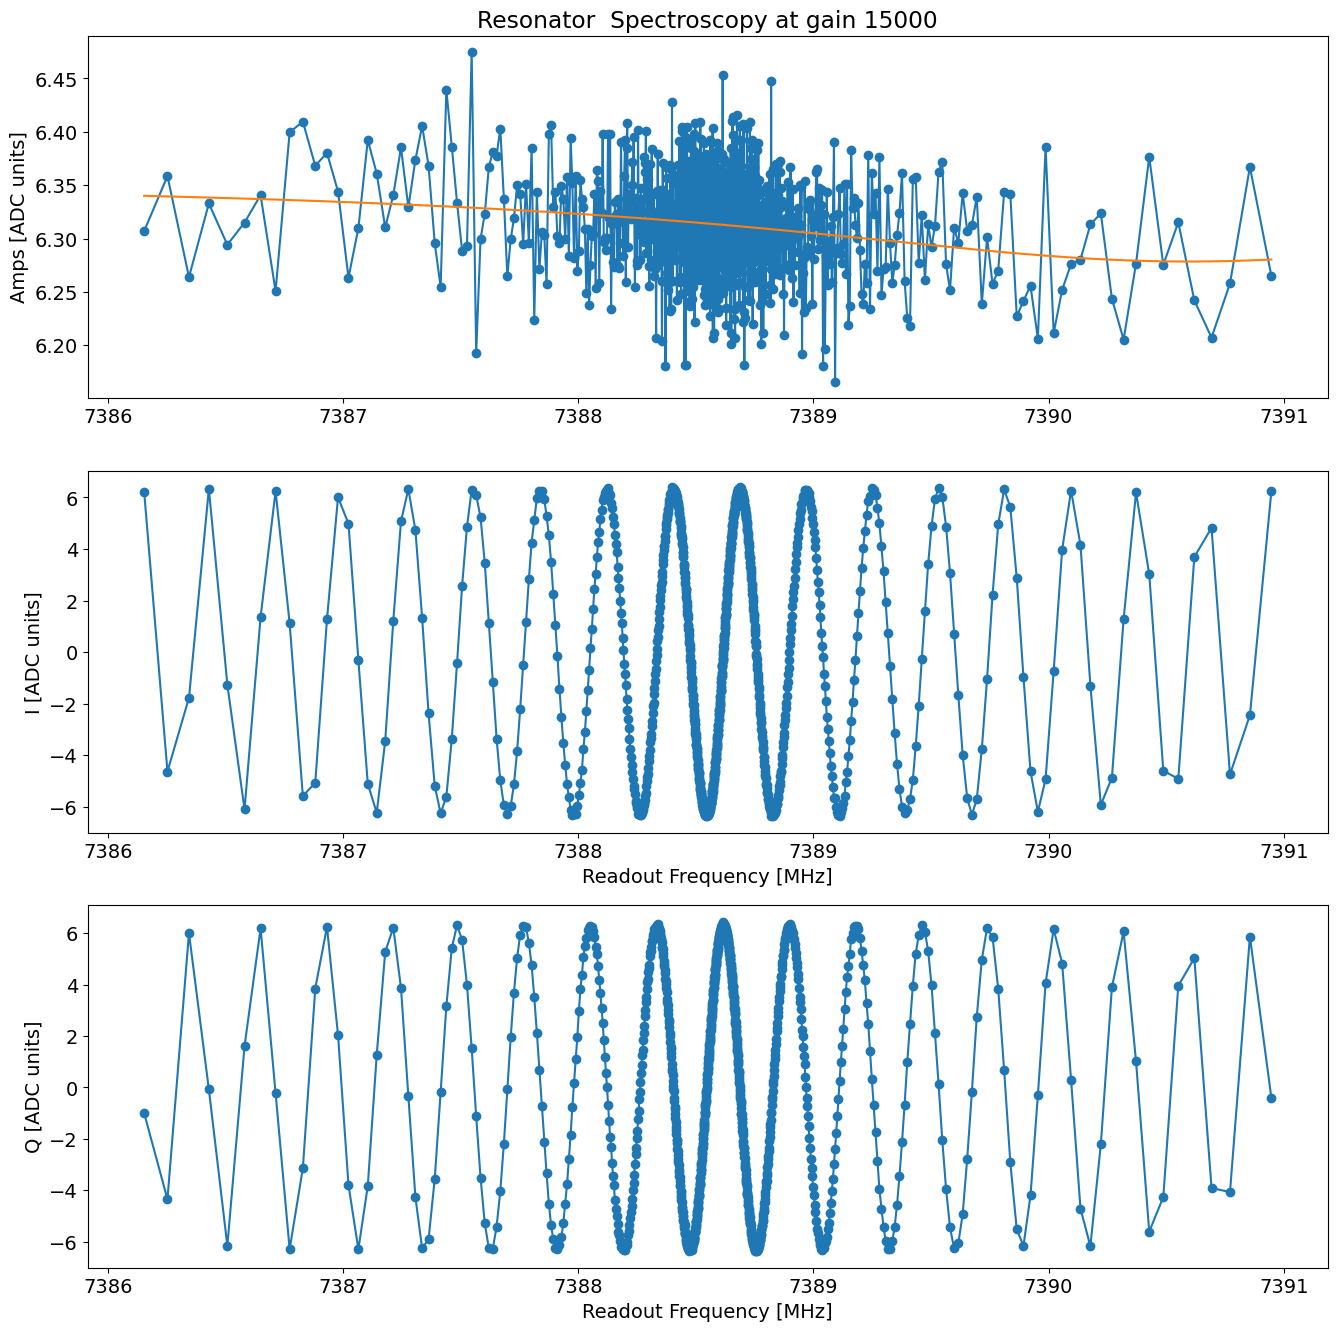

IndexError: list index out of range

In [27]:
# Fine 
for i in range(len(res_values)):
#for i in range(0):
    if i<num_qubits: qubit_i=i
    else: qubit_i=0
    # Next, run the fine scan for each to make sure they are good. 
    rspec = cfg.make_rspec_fine(soc, expt_path, cfg_path, qubit_i, i, center=res_values[i])
    rspec.go(analyze=True, display=True, progress=True, save=True)
    if i<num_qubits:
        auto_cfg = config.update_readout(cfg_file, 'frequency', float(rspec.data['lorentz_fit'][2]), i)
        auto_cfg = config.update_readout(cfg_file, 'kappa', float(2*rspec.data['lorentz_fit'][3]), i)

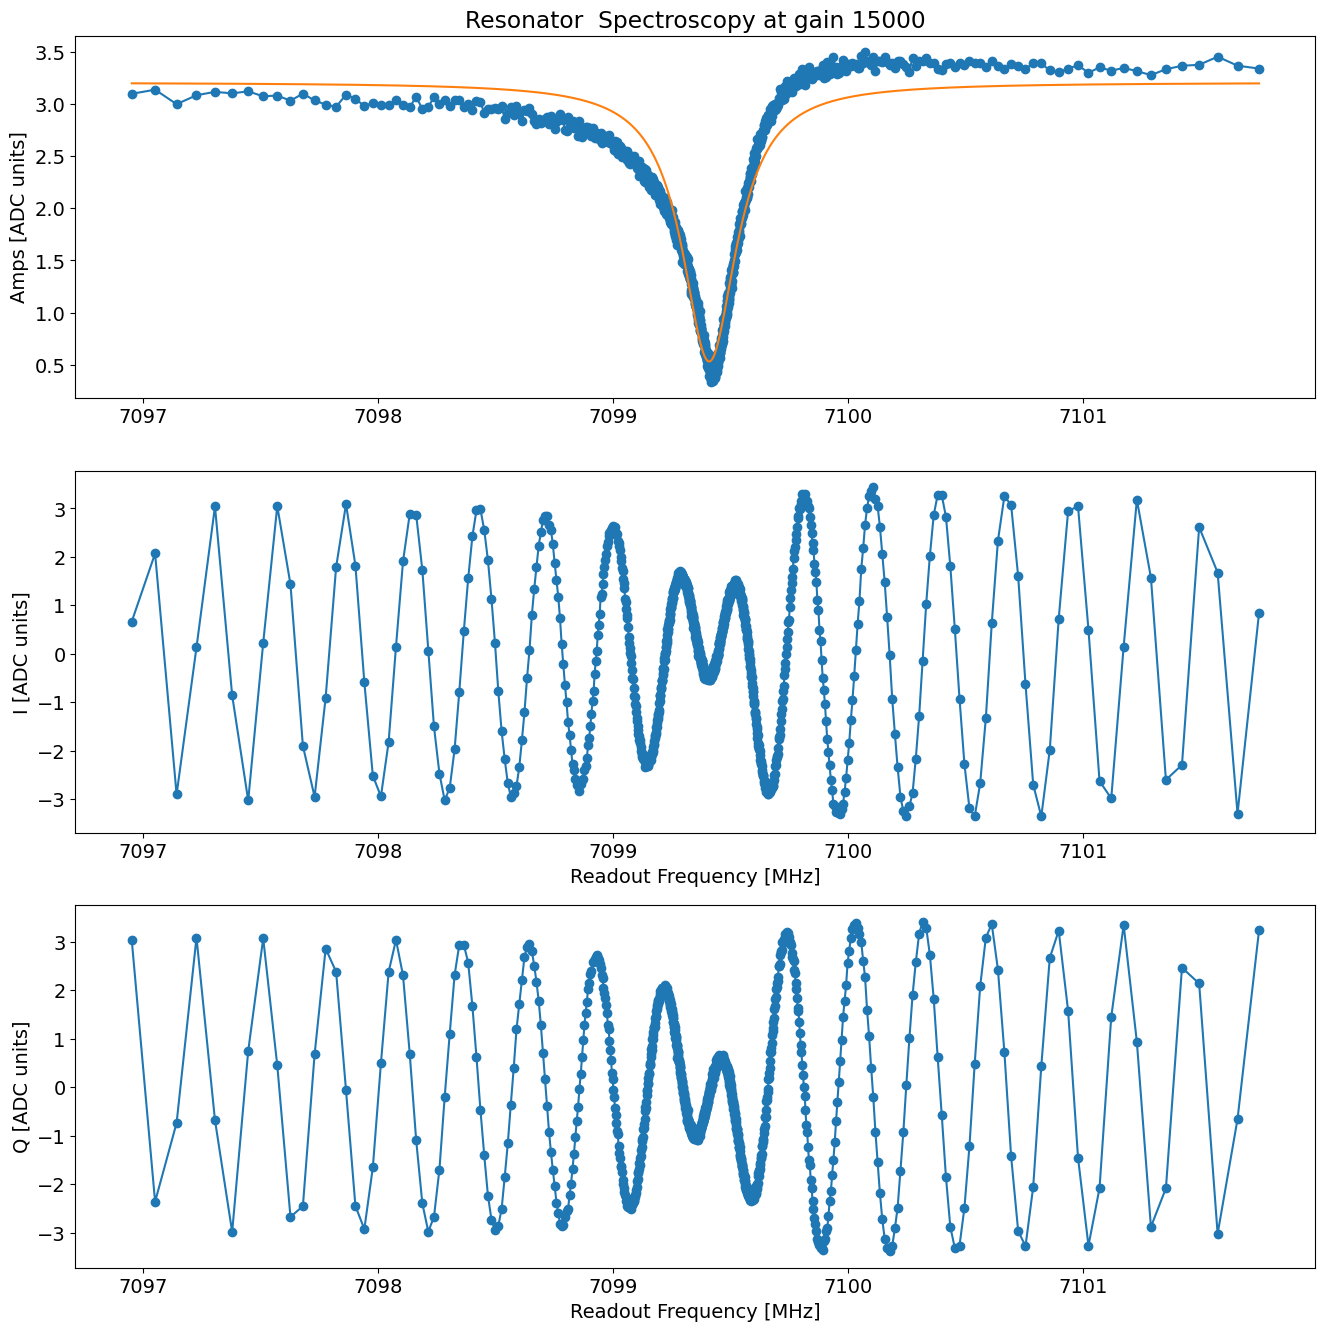

In [21]:
rspec.analyze(fit=True, findpeaks=False, coarse_scan = False)
rspec.display(fit=True, findpeaks=False, coarse_scan = False)

*Set cfg resonator 5 gain to 4000*


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00007_resonator_spectroscopy_res5.h5
From Fit:
	f0: 7249.8754434795765
	kappa[MHz]: 0.21144869329929125


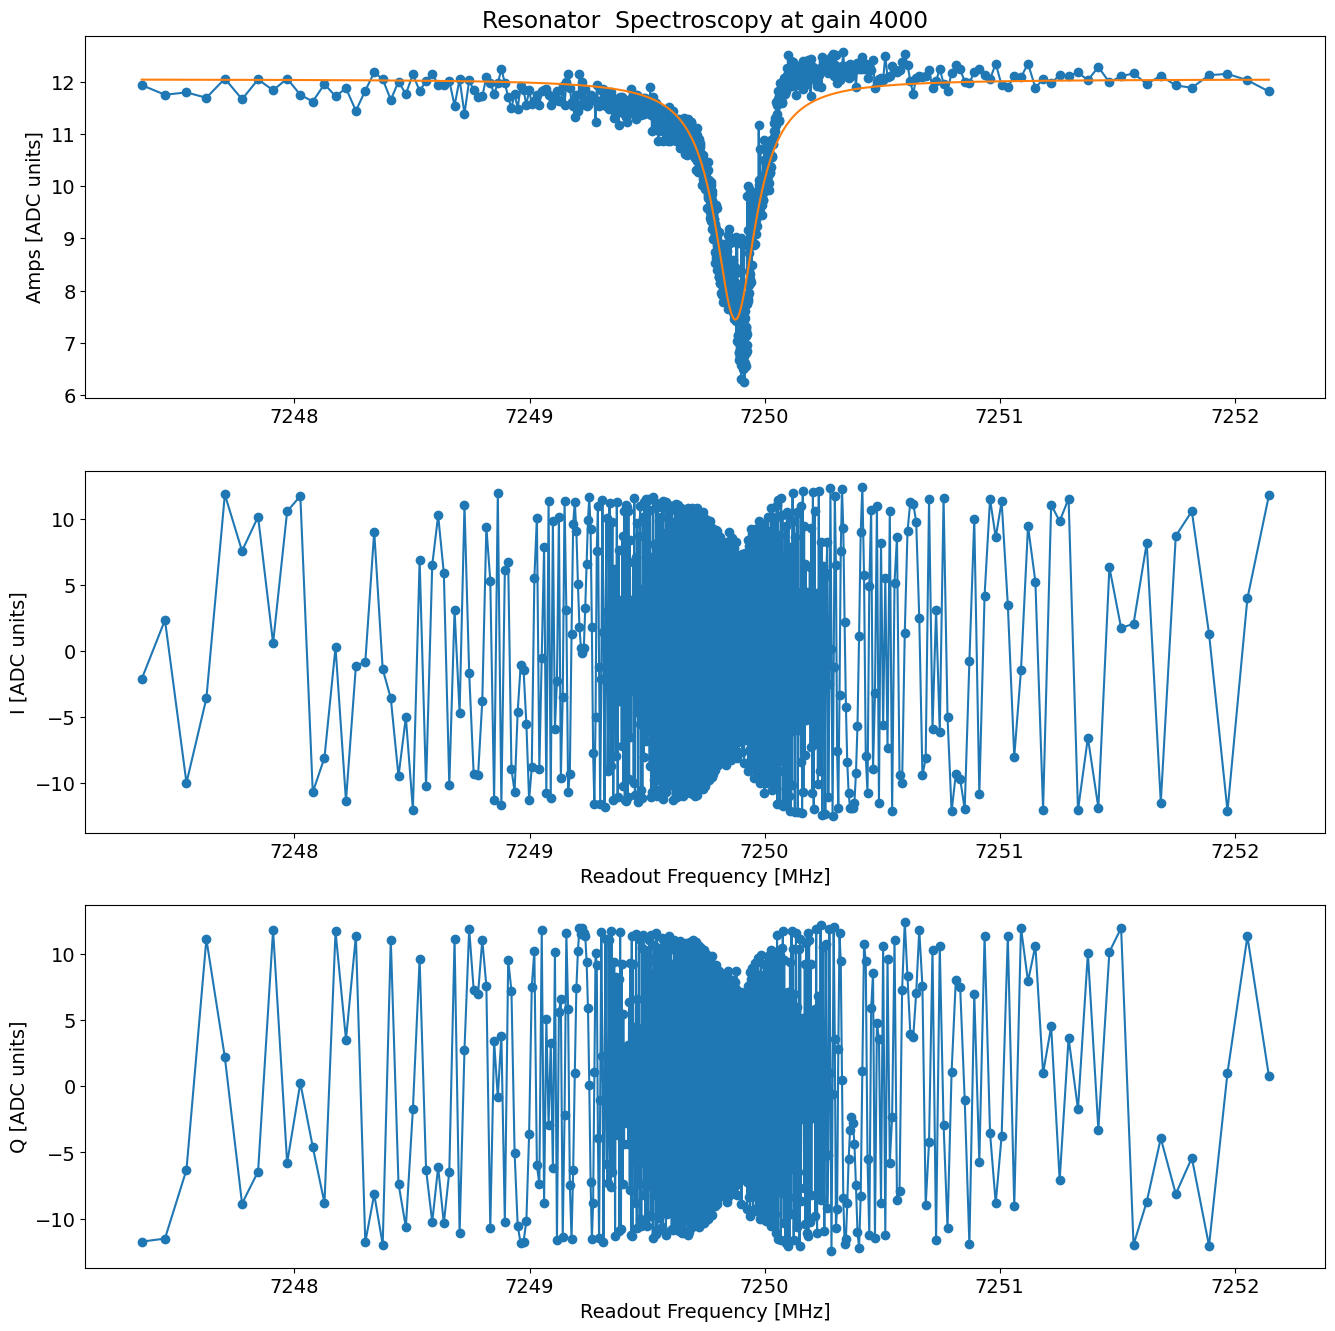

*Set cfg resonator 5 frequency to 7249.8754434795765*
*Set cfg resonator 5 kappa to 0.21144869329929125*


In [139]:
# Just run one qubit 
i = 5
#config.update_readout(cfg_file, 'gain', 4000, i)

rspec = cfg.make_rspec_fine(soc, expt_path, cfg_path, qubit_i, i, center=auto_cfg['device']['readout']['frequency'][qubit_i], reps=2000)
rspec.go(analyze=True, display=True, progress=True, save=True)
auto_cfg = config.update_readout(cfg_file, 'frequency', float(rspec.data['lorentz_fit'][2]), i)
auto_cfg = config.update_readout(cfg_file, 'kappa', float(2*rspec.data['lorentz_fit'][3]), i)

If you are okay with the peaks, save data to <code>auto_cfg.device.readout.frequency</code>

# Resonator Power Spectroscopy 

Find a good value for gain to park your readout at until you run readout optimization. From the 2D sweep that is produced, choose a value for gain that is right before the resonator 'breaks' (goes from e -> f). Want to choose a high value for gain because we want to be in the shot noise limited regime which increases our signal:noise ratio. The gain value should be saved in <code>auto_cfg.device.readout.gain</code>

  0%|          | 0/21 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00002_ResonatorPowerSweepSpectroscopyExperiment_qubit1.h5


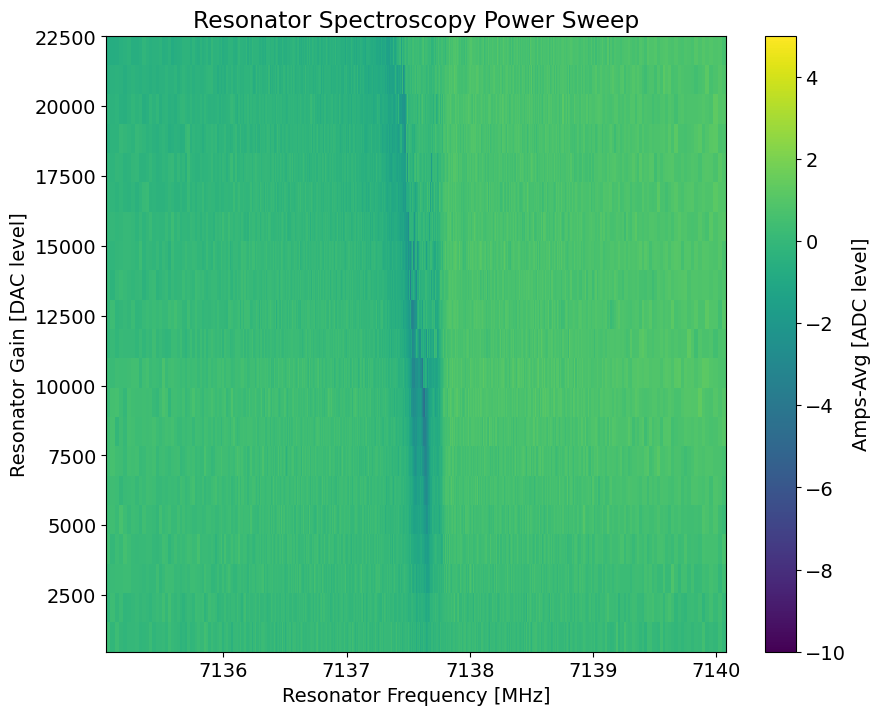

In [83]:
i = 1
rpowspec=cfg.make_rpowspec(soc, expt_path, cfg_path, i, auto_cfg['device']['readout']['frequency'][i], npts_f=1000, npts_gain=20, start_gain=1000, span_gain=21000, smart=True, reps=2000)
rpowspec.go(analyze=False, display=False, progress=True, save=True)

# Testing 
rpowspec.analyze(fit=False, lowgain=None, highgain=None)
rpowspec.display(fit=False)

In [140]:
# assign the resonator gain to the results config file
gain_values = [12000, 4000, 8000, 6000, 8750, 8000]
for i in range(num_qubits):
    auto_cfg = config.update_readout(cfg_file, 'gain', int(gain_values[i]), i)

*Set cfg resonator 0 gain to 12000*
*Set cfg res 0 gain to 12000*
*Set cfg resonator 1 gain to 4000*
*Set cfg res 1 gain to 4000*
*Set cfg resonator 2 gain to 8000*
*Set cfg res 2 gain to 8000*
*Set cfg resonator 3 gain to 6000*
*Set cfg res 3 gain to 6000*
*Set cfg resonator 4 gain to 8750*
*Set cfg res 4 gain to 8750*
*Set cfg resonator 5 gain to 8000*
*Set cfg res 5 gain to 8000*


# Qubit Spectroscopy Coarse Then Fine Scan

Running qubit spectroscopy for qubit 4
5.024471759796143


  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_qubit_spectroscopy_coarse_qubit4.h5
Found peak in amps at [MHz] 3266.450751053346
Found peak in amps at [MHz] 3616.3174177200126


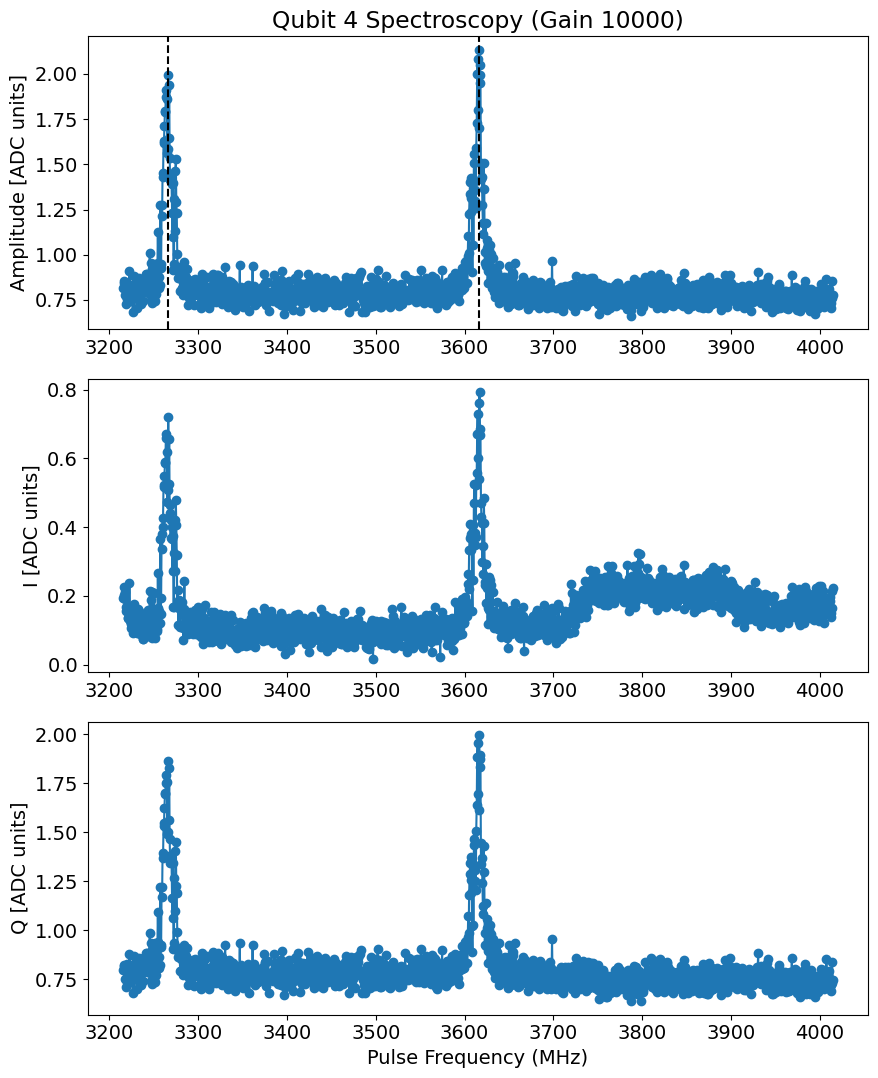

In [59]:
# You may want to update this frequency, which will be the center of the scan. 
#auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(3300), i)
i=4
print('Running qubit spectroscopy for qubit', i)
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, coarse=True, gain=10000)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

Found peak in amps at [MHz] 3310.1103863021085
Found peak in amps at [MHz] 3391.1770529687756
Found peak in amps at [MHz] 3570.9103863021087


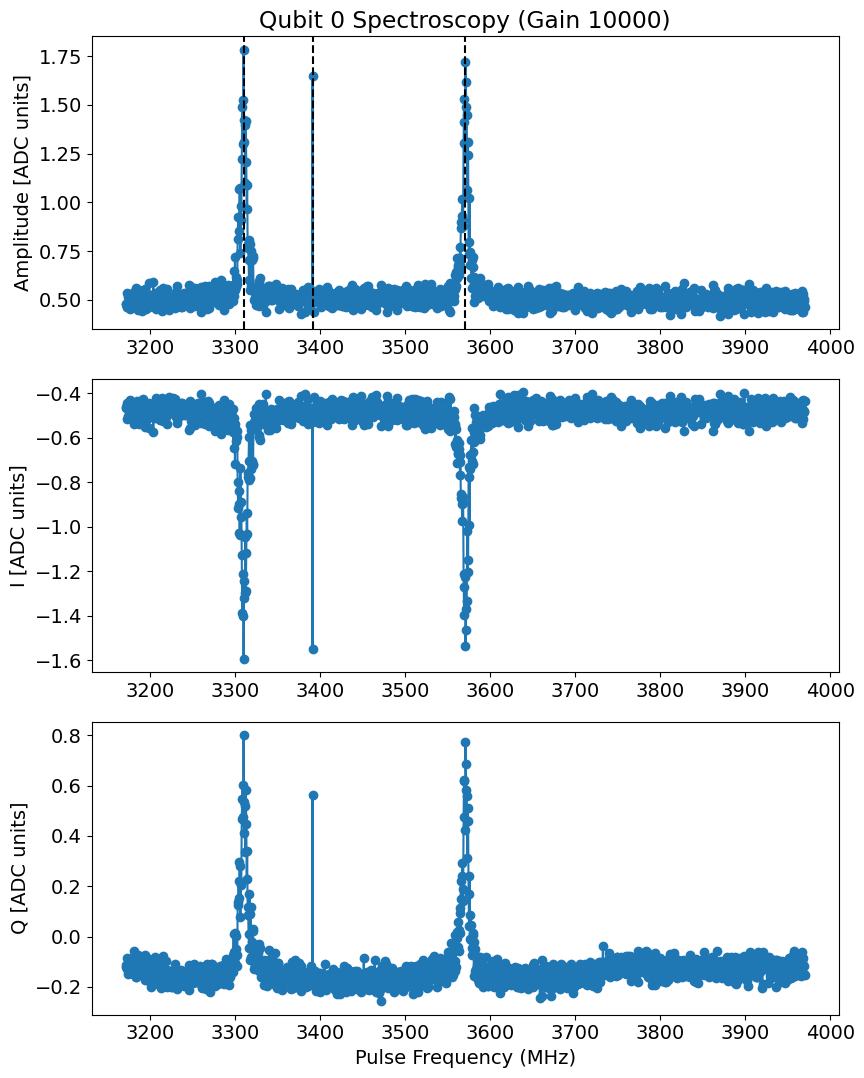

In [42]:
qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

In [56]:
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, coarse=True, gain=10000)
qspec.cfg.expt.start = auto_cfg['device']['qubit']['f_ge'][i] - 850
qspec.go(analyze=False, display=False, progress=True, save=True)

5.015800952911377


  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00005_qubit_spectroscopy_coarse_qubit0.h5


In [60]:
# Here, choose which peak you want to save the value for, adjust index accordingly

auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["coarse_peaks_x"][0]), i)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(qspec.data["coarse_peaks_x"][1]), i)

*Set cfg qubit 4 f_ef to 3266.450751053346 from 3266.113647674096*
*Set cfg qubit 4 f_ge to 3616.3174177200126 from 3615.250751053346*


5.015557050704956


  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00001_qubit_spectroscopy_coarse_qubit4.h5
Found peak in amps at [MHz] 3615.789741236978, HWHM 0.0695737617382933
Found peak in I at [MHz] 3615.7880704543654, HWHM -0.06758538427560706
Found peak in Q at [MHz] 3615.7897497456715, HWHM -0.07007021309653533


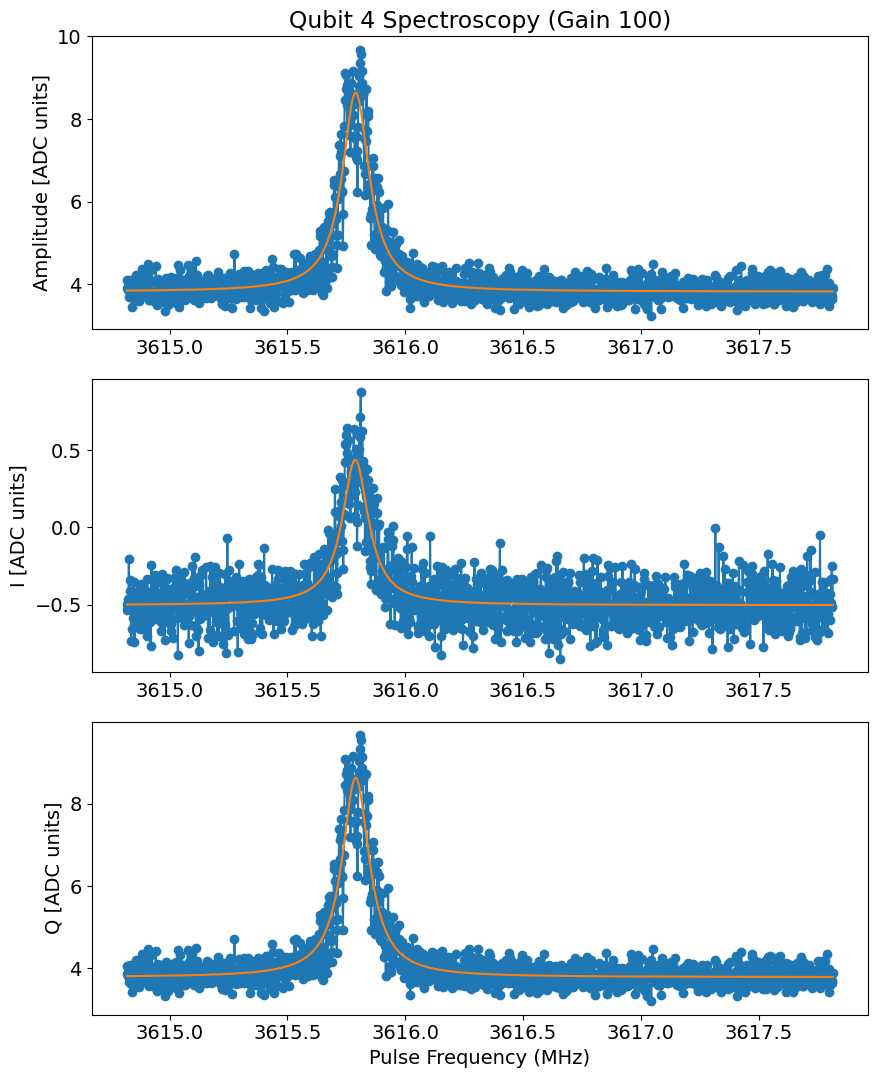

*Set cfg qubit 4 f_ge to 3615.789741236978 from 3616.3174177200126*
*Set cfg qubit 4 kappa to 0.1391475234765866 from -0.11355616400169431*


In [5]:
# Fine 
i=4
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=True, signs = [1,-1,-1])
qspec.display(fit=True, signs= [1, -1, -1])
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(qspec.data["fit_amps"][2]), i)
auto_cfg = config.update_qubit(cfg_file, 'kappa', float(2*qspec.data["fit_amps"][3]), i)

In [ ]:
# EF spectroscopy coarse 
# First set your guess of where it will be 

#auto_cfg = config.update_qubit(cfg_file, 'f_ef', auto_cfg['device']['qubit]['f_ge']-250), i)
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, ef=True, coarse=True)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=True, coarse=True)
qspec.display(fit=True, coarse=True)

  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00002_qubit_spectroscopy_coarse_qubit4.h5
Found peak in amps at [MHz] 3265.4919530636917, HWHM 0.06727125490284488
Found peak in I at [MHz] 3265.4942944618697, HWHM 0.0655634391032099
Found peak in Q at [MHz] 3265.491946362184, HWHM 0.06784075533456627


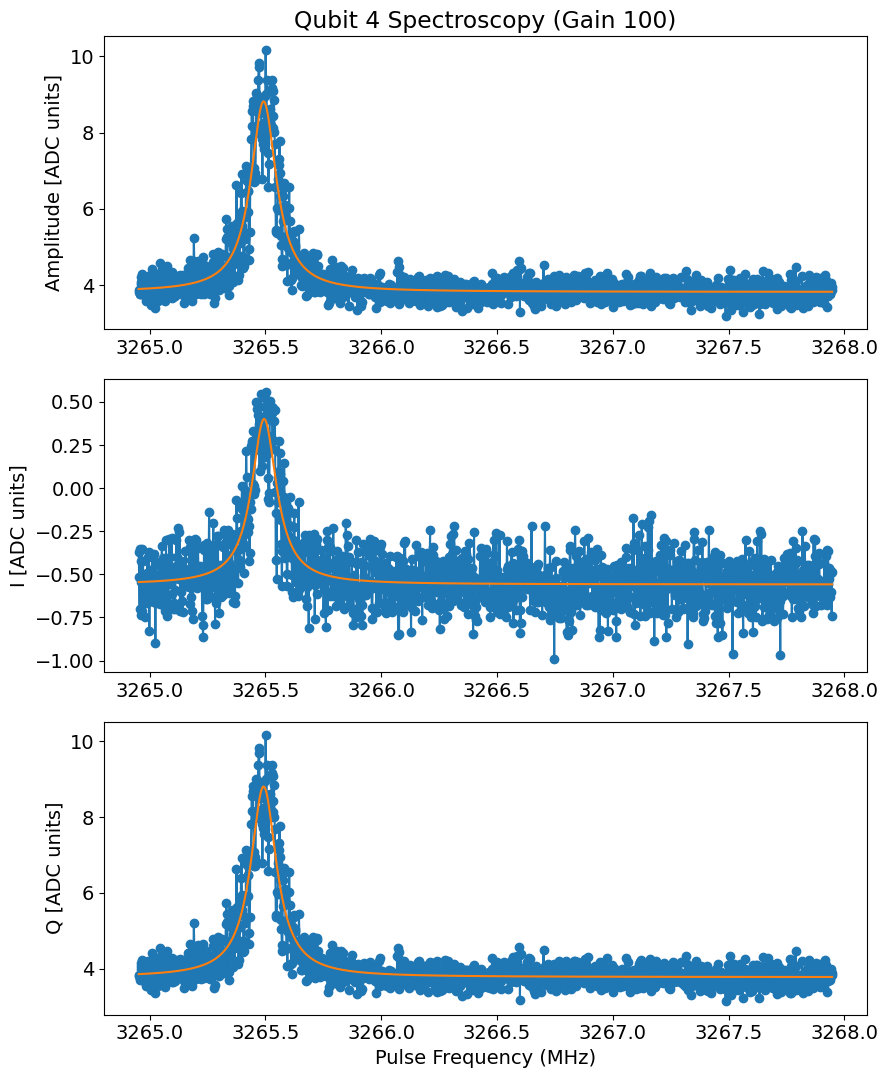

In [6]:
# EF spectroscopy fine 
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, ef=True)
qspec.go(analyze=False, display=False, progress=True, save=True)
qspec.analyze(fit=True, coarse=False)
qspec.display(fit=True, coarse=False)


In [7]:

auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["fit_amps"][2]), i)

*Set cfg qubit 4 f_ef to 3265.4919530636917 from 3266.450751053346*


  0%|          | 0/200 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_length_rabi_qubit4.h5
Decay from avgi [us] 0.6101326302801884
Pi length from avgi data [us]: 0.10208369585998717
	Pi/2 length from avgi data [us]: 0.05104184792999358

Decay from avgq [us] 1.1351698389213247
Pi length from avgq data [us]: 0.10526236285171857
Pi/2 length from avgq data [us]: 0.052631181425859284


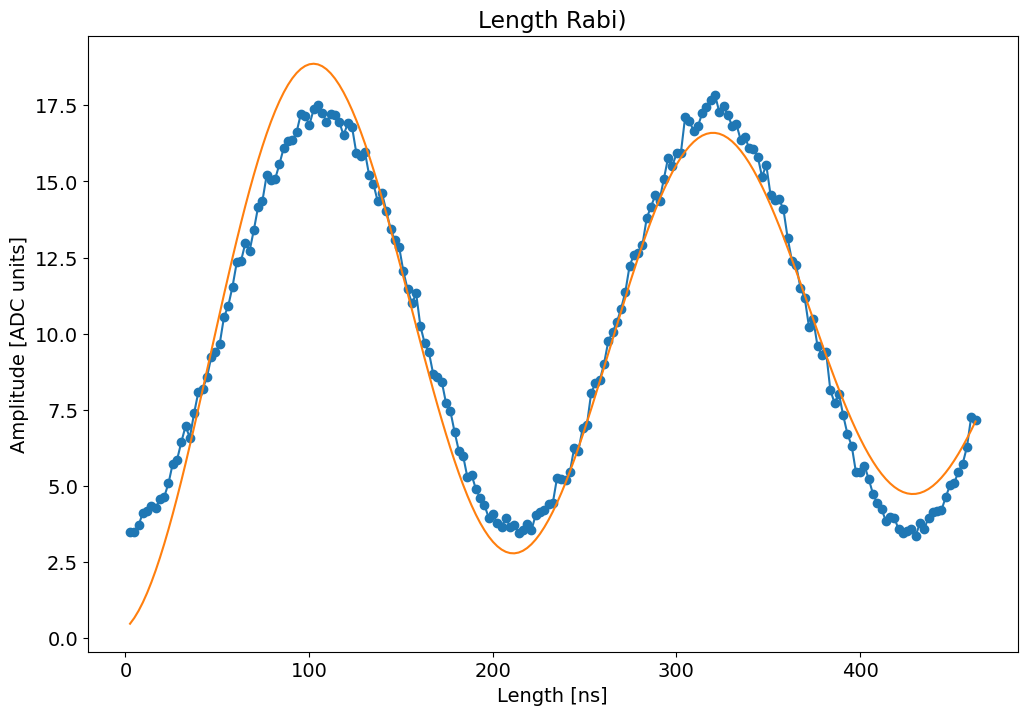

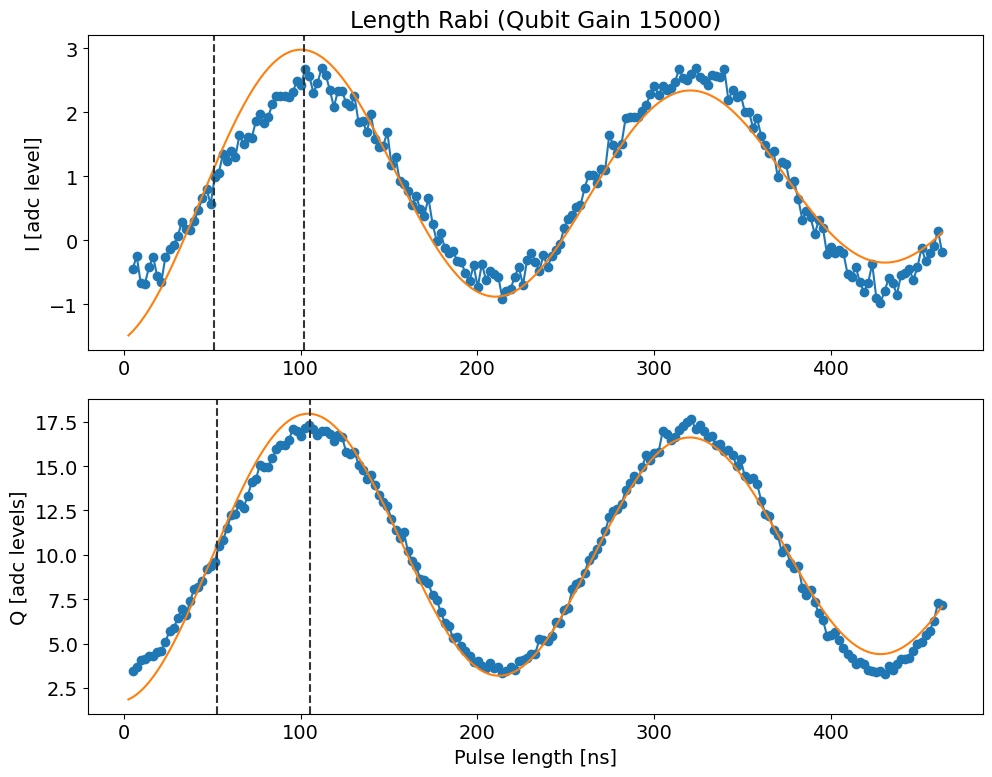

*Set cfg qubit 4 ('pulses', 'pi_ge', 'sigma') to 0.10208369585998717 from 0.10485498041091905*


In [8]:
# We don't need this for initial tuning 
lengthrabi = cfg.make_lengthrabi(soc, expt_path, cfg_path, i, gain=15000)
lengthrabi.go(analyze=True, display=True, progress=True, save=True)

auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','sigma'), float(lengthrabi.data['pi_length']), i)

qTest sigma =  0.10208369585998717
gauss


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00001_amp_rabi_qubit4.h5
Pi gain from amps data [dac units]: 15647
	Pi/2 gain from amps data [dac units]: 7823
Pi gain from avgi data [dac units]: 15648
	Pi/2 gain from avgi data [dac units]: 7824
Pi gain from avgq data [dac units]: 15676
	Pi/2 gain from avgq data [dac units]: 7838


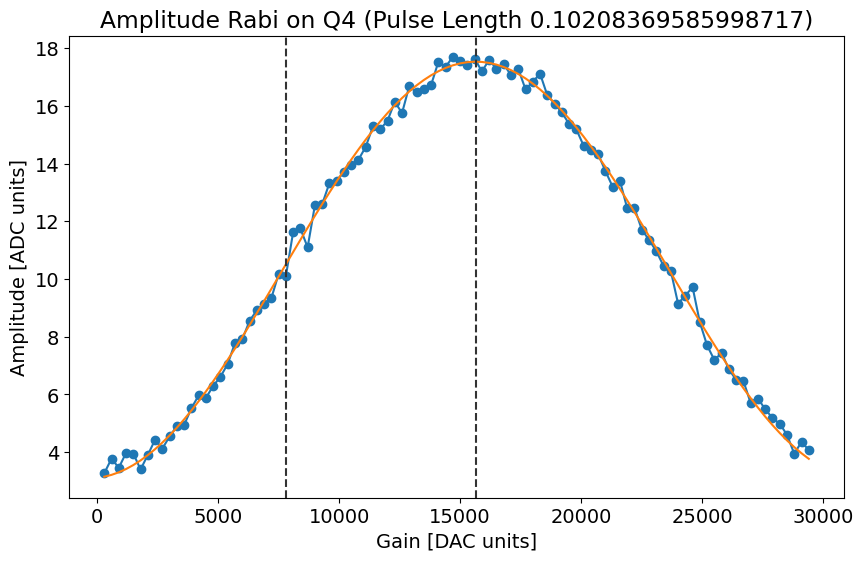

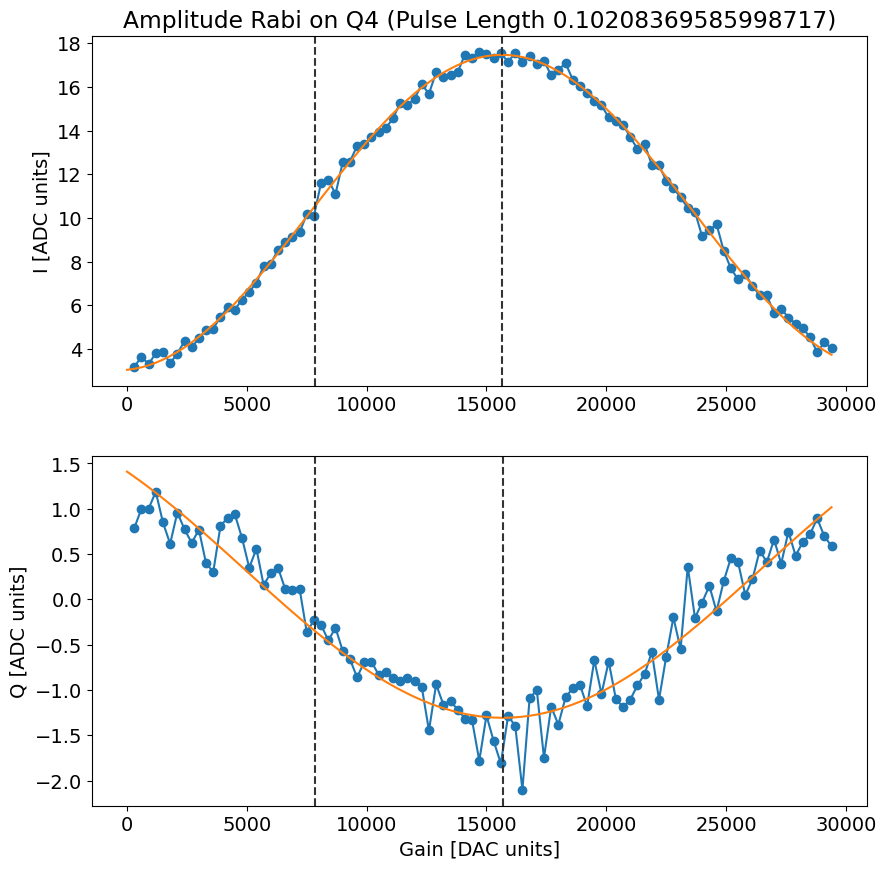

*Set cfg qubit 4 ('pulses', 'pi_ge', 'gain') to 15648 from 15605*


In [40]:
amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, gain=15000)
amp_rabi.go(analyze=True, display=True, progress=True, save=True)
auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','gain'), int(amp_rabi.data['pi_length']), i)

  0%|          | 0/40 [00:00<?, ?it/s]

gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
Saving C:\_Data\LLqub2\Tuning_2024_05_07\00003_amp_rabi_qubit_chevron4.h5


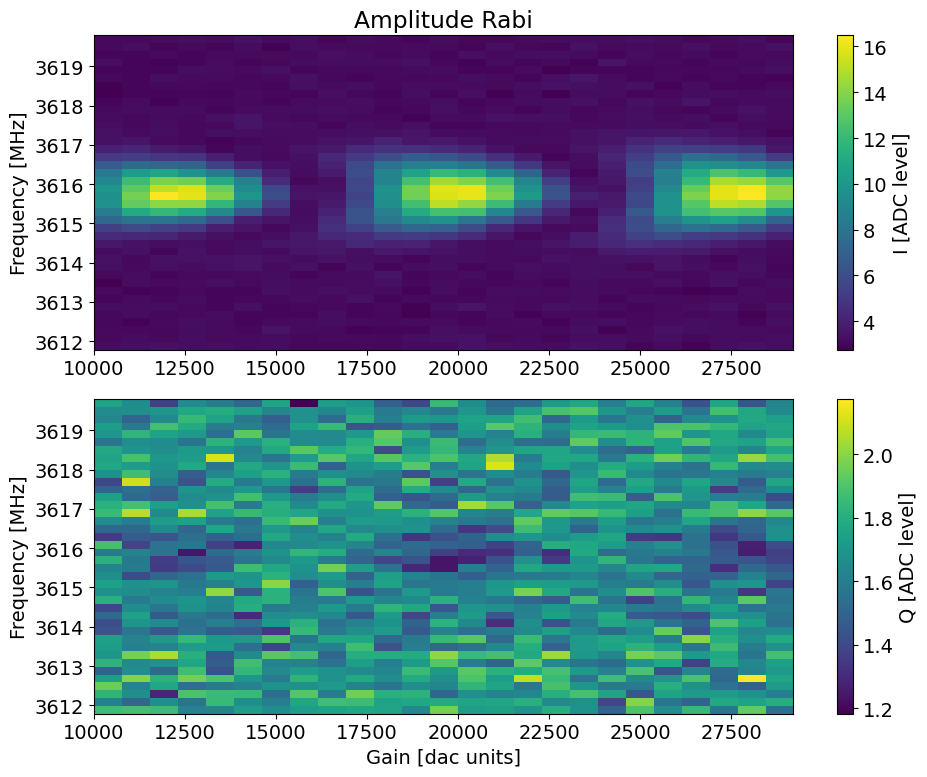

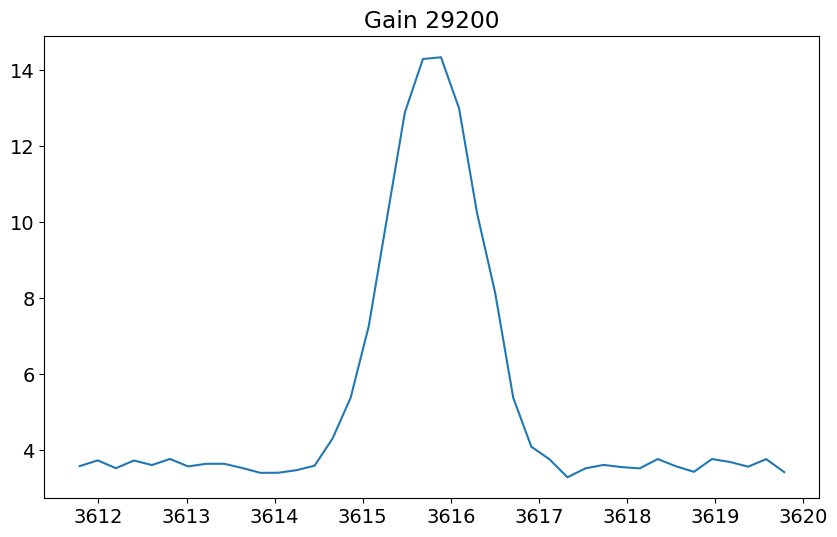

In [57]:
amp_chevron = cfg.make_amprabi_chevron(soc, expt_path, cfg_path, i, sigma=0.4, span_f=8)
amp_chevron.go(analyze=True, display=True, progress=True, save=True)

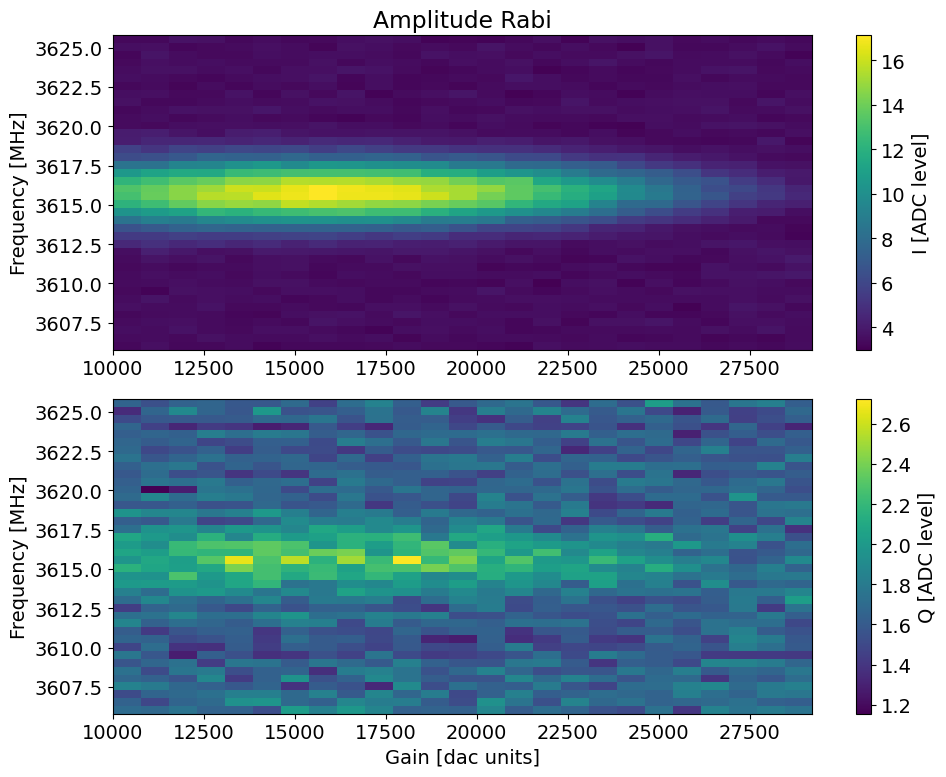

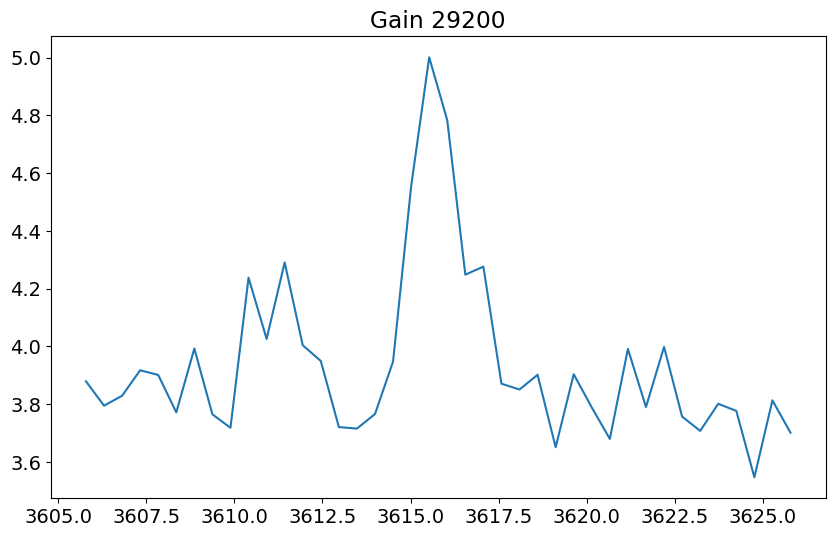

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_amp_rabi_qubit_chevron4.h5


'C:\\_Data\\LLqub2\\Tuning_2024_05_07\\00000_amp_rabi_qubit_chevron4.h5'

In [48]:
amp_chevron.analyze()
amp_chevron.display()
amp_chevron.save_data()

  0%|          | 0/2 [00:00<?, ?it/s]

Attempted to init fitparam 1 to 0.10702341137123746, which is out of bounds 0.0006711409395973155 to 0.10067114093959731. Instead init to 0.05067114093959731
Attempted to init fitparam 1 to 0.10702341137123746, which is out of bounds 0.0006711409395973155 to 0.10067114093959731. Instead init to 0.05067114093959731
Attempted to init fitparam 1 to 0.10702341137123746, which is out of bounds 0.0006711409395973155 to 0.10067114093959731. Instead init to 0.05067114093959731
Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_ramsey_qubit4.h5
Current pi pulse frequency: 3615.789741236978
Fit frequency from amps [MHz]: 0.04254438257247954 +/- 0.0007442069952226217
Suggested new pi pulse frequencies from fit amps [MHz]:
 	3615.8471968544054
 	3615.6471968544056
T2 Ramsey from fit amps [us]: 44.7
Current pi pulse frequency: 3615.789741236978
Fit frequency from I [MHz]: 0.04604616287609946 +/- 0.000673831237283105
Suggested new pi pulse frequency from fit I [MHz]:
 	3615.843695074102
 	3615.643695074

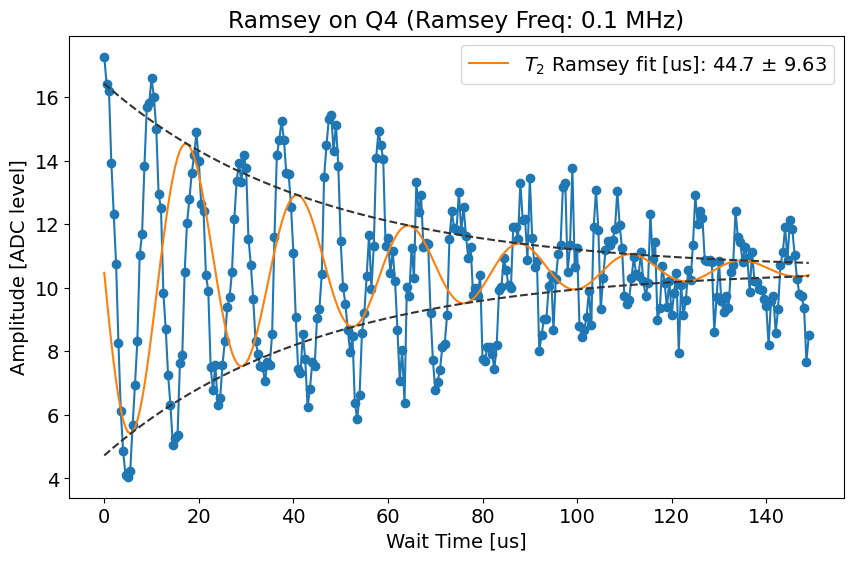

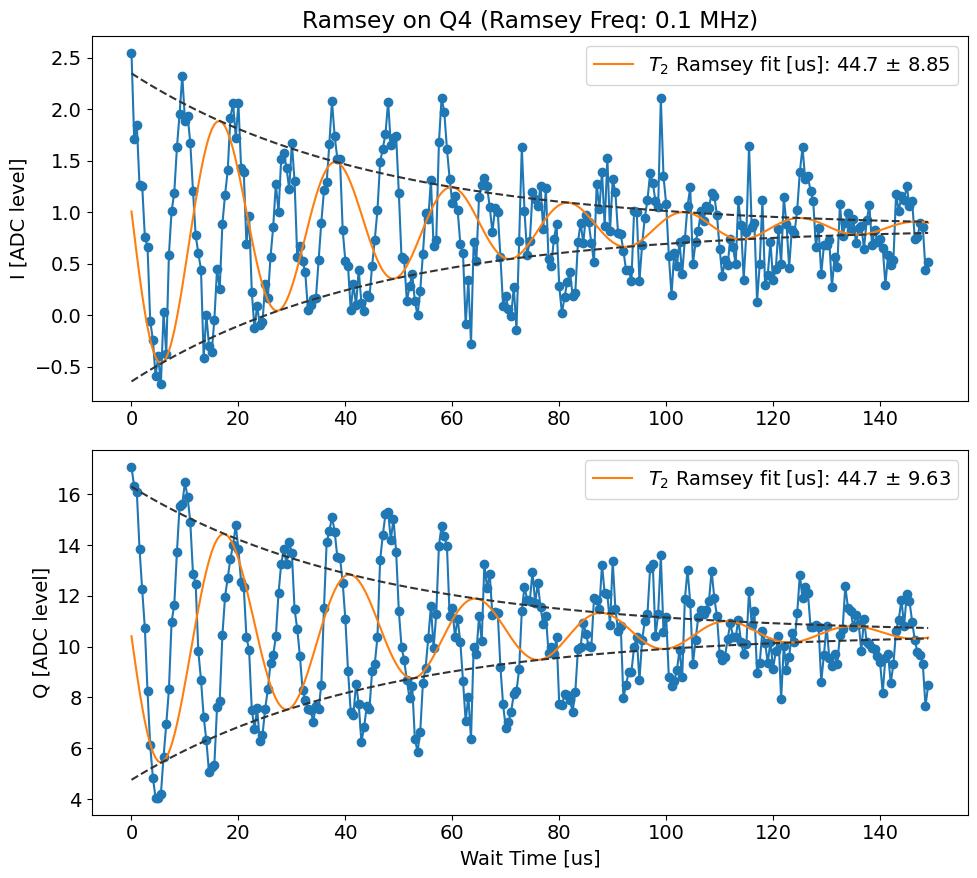

*Set cfg qubit 4 f_ge to 3615.843695074102 from 3615.789741236978*


In [9]:
t2r=cfg.make_t2r(soc, expt_path, cfg_path, i, go=True)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(t2r.data['new_freq']), i)

  0%|          | 0/100000 [00:00<?, ?it/s]

c:\_Lib\python\rfsoc\elaine_rfsoc\slab_rfsoc_expts\experiments\fitting.py:64: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)
c:\_Lib\python\rfsoc\elaine_rfsoc\slab_rfsoc_expts\experiments\fitting.py:64: RuntimeWarning: overflow encountered in multiply
  return y0 + yscale*np.exp(-(x-x0)/decay)


t1_i error:fit ratio= 0.039527305180389063
t1_q error:fit ratio= 2491.3837037902417
t1_i is better, saving T1_i to results cfg file
Fit T1 avgi [us]: 148.33090156268295
Fit T1 avgq [us]: 146373.76937682662


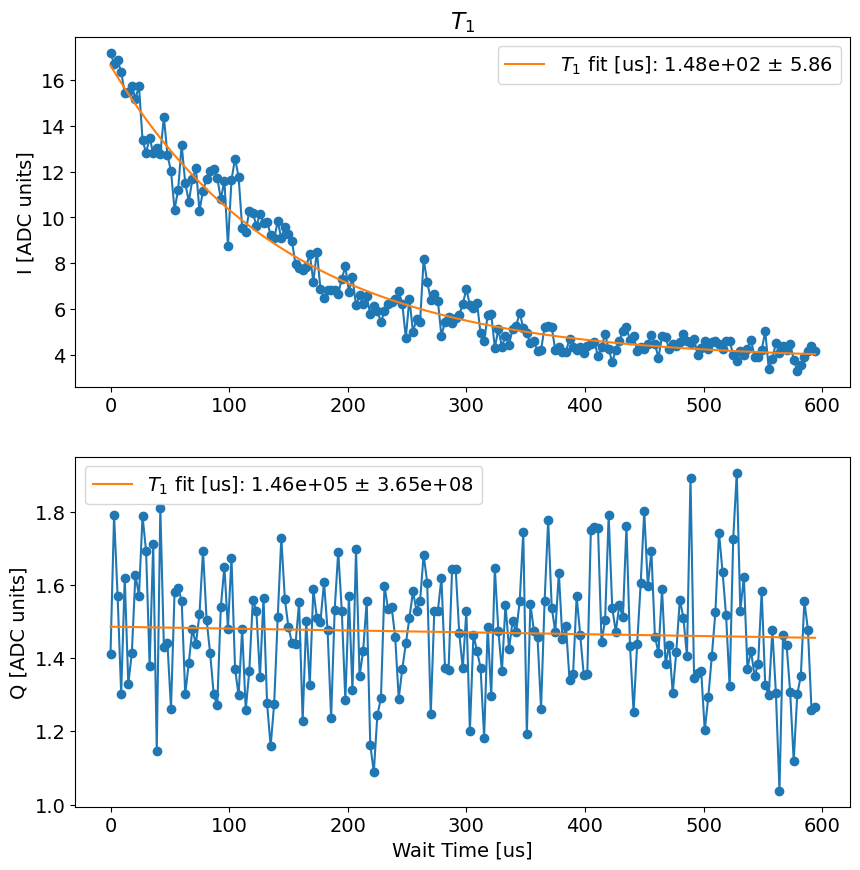

*Set cfg qubit 4 T1 to 148.33090156268295 from 127.32060333013428*


In [23]:
t1 = cfg.make_t1(soc, expt_path, cfg_path, i, go=True) 
auto_cfg = config.update_qubit(cfg_file, 'T1', float(t1.data['new_t1']), i)

using phase reset
<Pyro4.core.Proxy at 0x2b188385de0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/10000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/10000 [00:00<?, ?it/s]

Unrotated:
Ig -0.11727055760468649 +/- 3.966036645531912 	 Qg 3.5 +/- 4.172982577484347 	 Amp g 3.501964075155671
Ie 5.378715556519852 +/- 4.481512309354179 	 Qe 17.080060750705144 +/- 5.817897259574596 	 Amp e 17.906955528110498
hi
Rotated:
Ig 3.154143743534143 +/- 3.966036645531912 	 Qg 1.4671790904655984 +/- 4.172982577484347 	 Amp g 3.478683262151793
Ie 18.00430930712548 +/- 4.481512309354179 	 Qe 1.2642175805337401 +/- 5.817897259574596 	 Amp e 18.048639830125037
Saving C:\_Data\LLqub2\Tuning_2024_05_07\00002_single_shot_qubit4.h5
Unrotated:
Ig -0.11727055760468649 +/- 3.966036645531912 	 Qg 3.5 +/- 4.172982577484347 	 Amp g 3.501964075155671
Ie 5.378715556519852 +/- 4.481512309354179 	 Qe 17.080060750705144 +/- 5.817897259574596 	 Amp e 17.906955528110498
hi
Rotated:
Ig 3.154143743534143 +/- 3.966036645531912 	 Qg 1.4671790904655984 +/- 4.172982577484347 	 Amp g 3.478683262151793
Ie 18.00430930712548 +/- 4.481512309354179 	 Qe 1.2642175805337401 +/- 5.817897259574596 	 Amp e 18.0

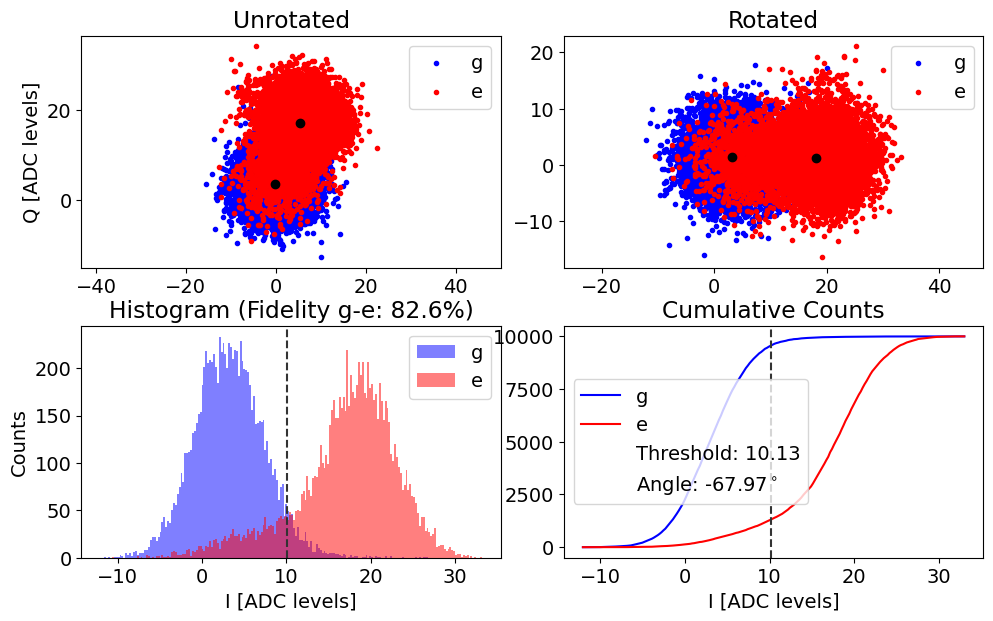

ge fidelity (%): 82.56412820641033
rotation angle (deg): -67.96632937884567
threshold ge: 10.12698135953438
*Set cfg resonator 4 phase to -67.96632937884567 from -66.66698190404814*
*Set cfg resonator 4 threshold to 10.12698135953438 from 10.16919003347387*


{'aliases': {'readout_LO': 'SC_26C1', 'soc': 'Qick233'},
 'device': {'qubit': {'T1': [152.00205320730348,
    100,
    223.8510354460513,
    184.7099922751801,
    148.33090156268295,
    100],
   'f_EgGf': [2000, 2000, 2000, 2000, 2000, 2000],
   'f_ef': [3310.7770529687755, 4000, 4000, 4000, 3265.4919530636917, 4000],
   'f_ge': [3570.9103863021087,
    3075.591168213095,
    3347.556598537022,
    3547.5436514316134,
    3615.7841477324246,
    3085.031258598829],
   'kappa': [-0.10791503228986564,
    0,
    0,
    0,
    0.1391475234765866,
    -0.00396080935438564],
   'pulses': {'hpi_ge': {'gain': [500, 500, 500, 500, 500, 500],
     'sigma': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
     'type': ['gauss', 'gauss', 'gauss', 'gauss', 'gauss', 'gauss']},
    'pi_EgGf': {'gain': [10000, 10000, 10000, 10000, 10000, 10000],
     'sigma': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
     'type': ['gauss', 'gauss', 'gauss', 'gauss', 'gauss', 'gauss']},
    'pi_ef': {'gain': [10000, 10000, 10000, 10000, 1581

In [24]:
# Single shot 
i=4
#config.update_readout(cfg_file, 'gain', 8000, i)
#config.update_readout(cfg_file, 'readout_length',15,i)
shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, go=True)
config.update_readout(cfg_file, 'phase', float(shot.data['angle']), i)
config.update_readout(cfg_file, 'threshold', float(shot.data['thresholds'][0]), i)

qTest =  0.10208369585998717
gauss


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_amp_rabi_qubit4.h5
Pi gain from amps data [dac units]: 15616
	Pi/2 gain from amps data [dac units]: 7808
Pi gain from avgi data [dac units]: 15605
	Pi/2 gain from avgi data [dac units]: 7802
Pi gain from avgq data [dac units]: 15609
	Pi/2 gain from avgq data [dac units]: 7804


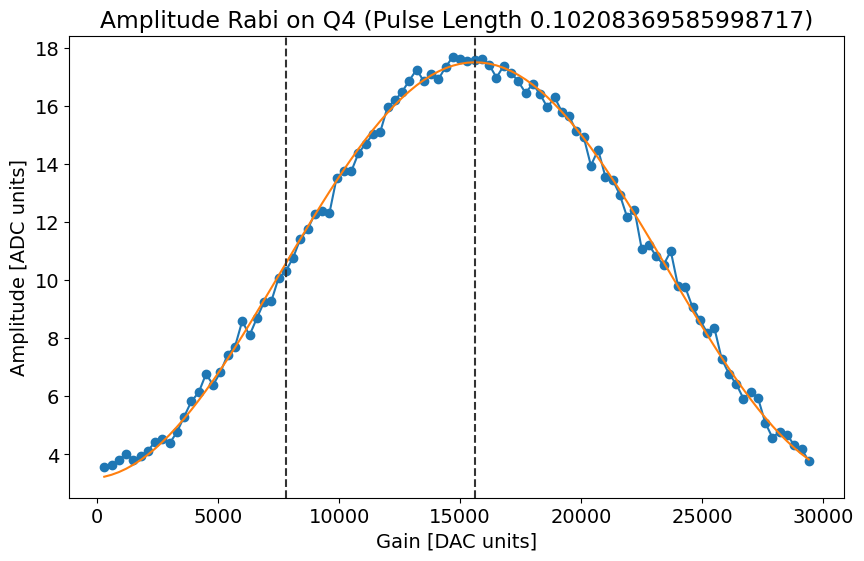

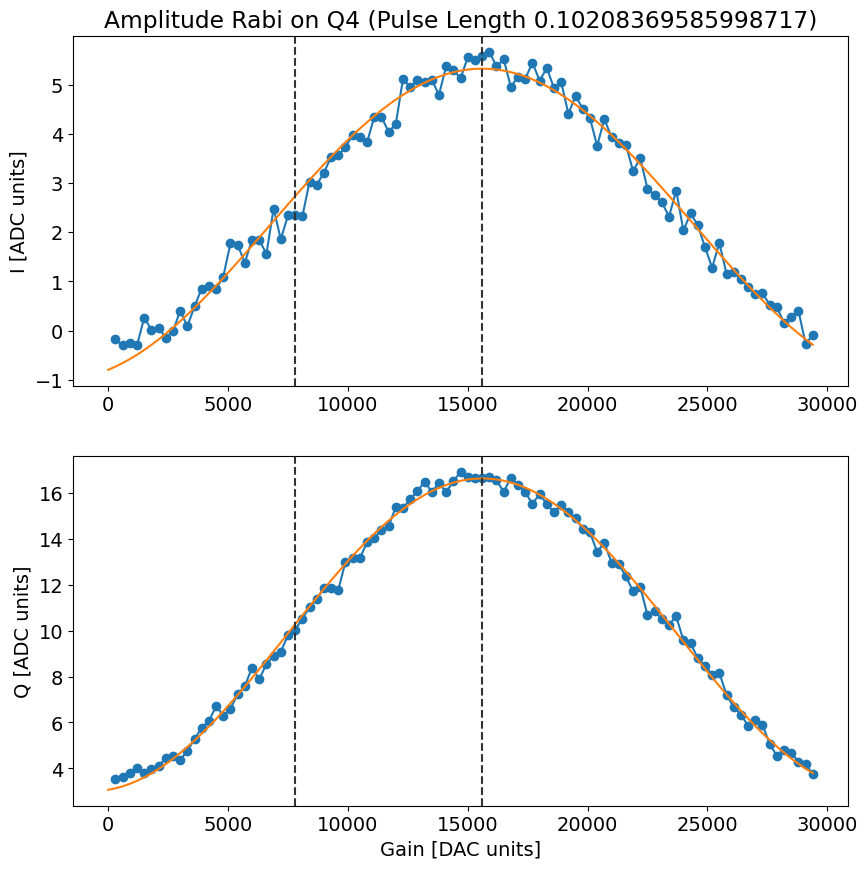

*Set cfg qubit 4 ('pulses', 'pi_ge', 'gain') to 15605 from 15336*


  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00002_ramsey_qubit4.h5
Current pi pulse frequency: 3615.7841477324246
Fit frequency from amps [MHz]: 0.09753794244509537 +/- 0.00020100955485135316
Suggested new pi pulse frequencies from fit amps [MHz]:
 	3615.7866097899796
 	3615.5866097899793
T2 Ramsey from fit amps [us]: 53.07537475474971
Current pi pulse frequency: 3615.7841477324246
Fit frequency from I [MHz]: 0.09744860908831614 +/- 0.0002312120633245862
Suggested new pi pulse frequency from fit I [MHz]:
 	3615.7866991233363
 	3615.586699123336
T2 Ramsey from fit I [us]: 46.5283589721804
Fit frequency from Q [MHz]: 0.09753747021610235 +/- 0.00020102748696439304
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3615.7866102622083
 	3615.5866102622085
T2 Ramsey from fit Q [us]: 53.54862857853497


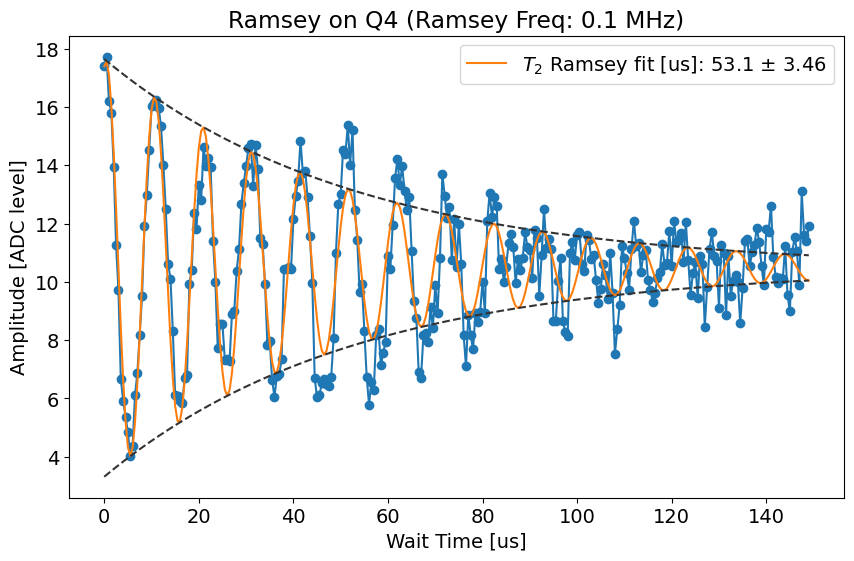

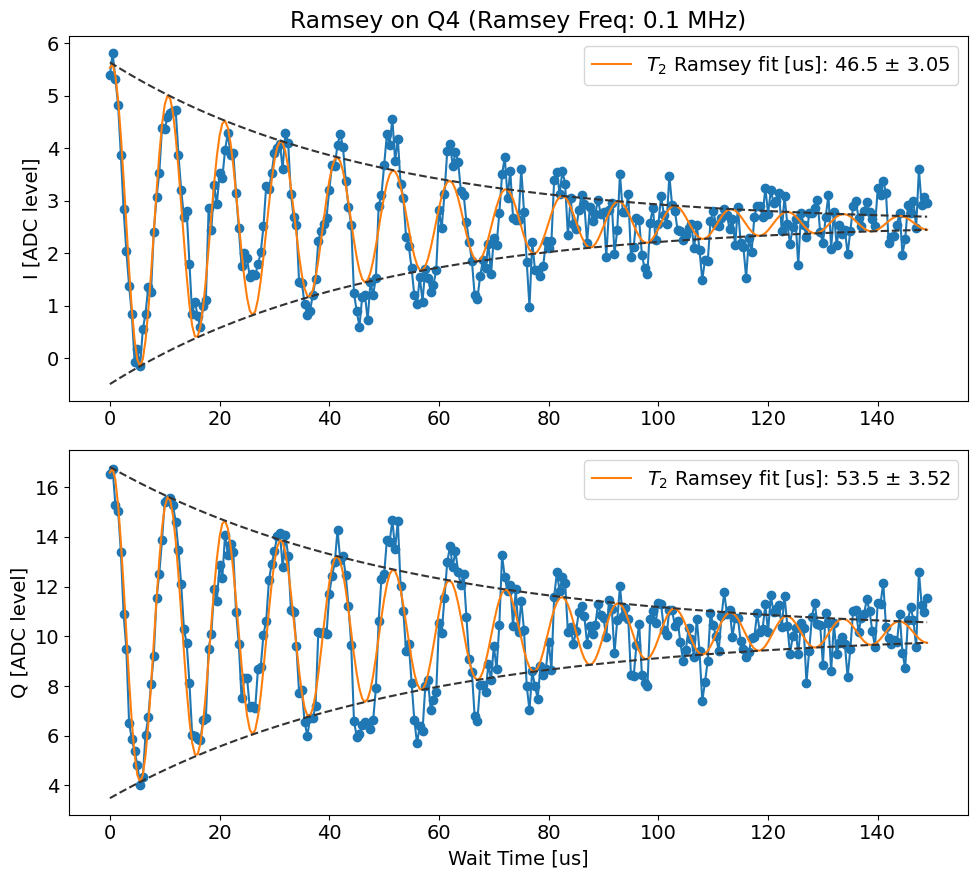

*Set cfg qubit 4 f_ge to 3615.7866097899796 from 3615.7841477324246*


  0%|          | 0/100000 [00:00<?, ?it/s]

c:\Users\slab\anaconda3\envs\slab\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


t1_i error:fit ratio= 0.0372257569561904
t1_q error:fit ratio= inf
t1_i is better, saving T1_i to results cfg file
Fit T1 avgi [us]: 117.8228858201617
Fit T1 avgq [us]: 114.56235391872141


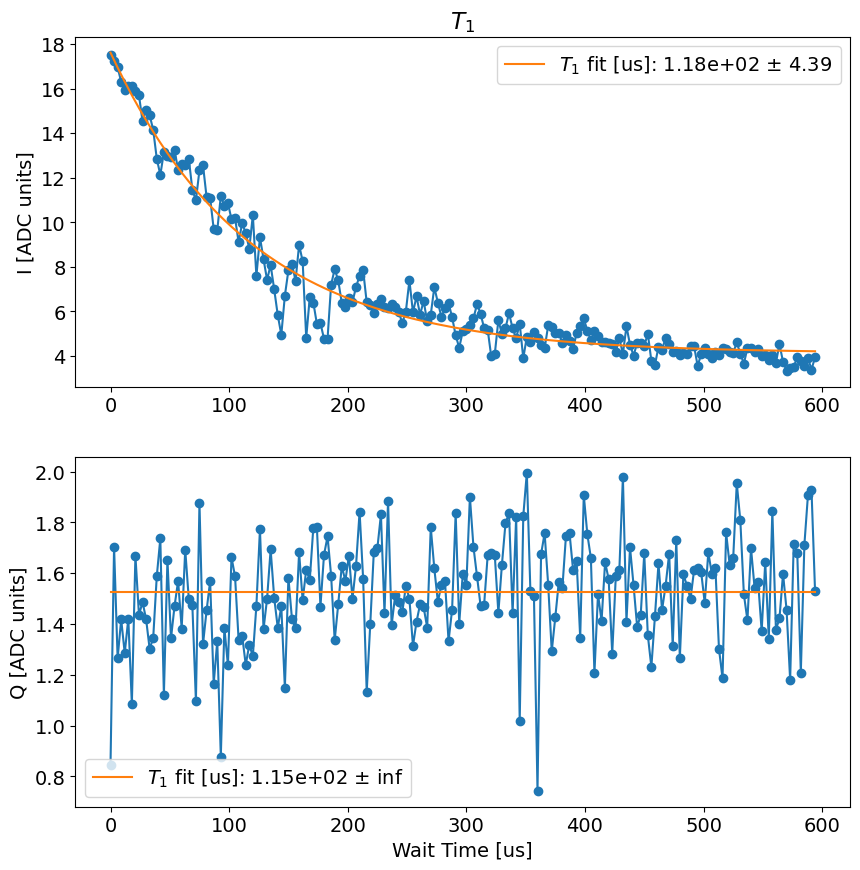

*Set cfg qubit 4 T1 to 117.8228858201617 from 148.33090156268295*


In [25]:
amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, gain=15000)
amp_rabi.go(analyze=True, display=True, progress=True, save=True)
auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','gain'), int(amp_rabi.data['pi_length']), i)

t2r=cfg.make_t2r(soc, expt_path, cfg_path, i)
t2r.go(analyze=True, display=True, progress=True, save=True)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(t2r.data['new_freq']), i)

t1 = cfg.make_t1(soc, expt_path, cfg_path, i) 
t1.go(analyze=True, display=True, progress=True, save=False)
auto_cfg = config.update_qubit(cfg_file, 'T1', float(t1.data['new_t1']), i)

In [ ]:

shot = cfg.make_singleshot(soc, expt_path, cfg_path, i)
shot.go(analyze=True, display=True, progress=True, save=True)
config.update_readout(cfg_file, 'phase', float(shot.data['angle']), i)
config.update_readout(cfg_file, 'threshold', float(shot.data['thresholds'][0]), i)

In [33]:
t2e = cfg.make_t2e(soc, expt_path, cfg_path, i)
t2e.go(analyze=False, display=False, progress=True, save=False)

RuntimeError: Immediate values are only 31 bits 2995931428 > 2**31

In [31]:
shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i)
shotopt.go(analyze=False, display=False, progress=True, save=False)

  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: ufunc 'left_shift' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [56]:
qubit_i=4
shotopt = meas.SingleShotOptExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"single_shot_opt_qubit{qubit_i}",
    config_file=cfg_file,
)

span_f = 1.0 # MHz
npts_f = 10

span_gain = 25000
npts_gain = 1

span_len = 20 # us
npts_len = 1

shotopt.cfg.expt = dict(
    reps=15000,
    qubit=qubit_i,
    start_f=cfg.device.readout.frequency[qubit_i] - 0.5*span_f,
    step_f=span_f/npts_f,
    expts_f=npts_f,
    start_gain=cfg.device.readout.gain[qubit_i],#start_gain=1000,
    step_gain=span_gain/npts_gain,
    expts_gain=npts_gain,
    start_len=cfg.device.readout.readout_length[qubit_i],
    step_len=span_len/npts_len,
    expts_len=npts_len,
)

shotopt.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/1 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186a647c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18924a2c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1867a48b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bcf190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186a64730; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b45eb60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dffd60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b45cbb0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dfc970; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18836d0c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dfc3a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd4df00; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bcac400; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186a64f10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dfc8e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd78b20; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bcac970; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18836c580; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd4ce20; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bcacac0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd119f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd4ca90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bcad930; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd4c190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd4ff40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b408820; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dfdb40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b018760; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd10f40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b40bbe0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b48b7c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b48b910; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b4098d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186a65db0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b489510; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/15000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/15000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00001_single_shot_opt_qubit4.h5


In [62]:
auto_cfg['device']['readout']['readout_length'][qubit_i]

15

In [13]:
shotopt.save_data()

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00002_single_shot_opt_qubit4.h5


'C:\\_Data\\LLqub2\\Tuning_2024_05_07\\00002_single_shot_opt_qubit4.h5'

qTest sigma =  0.1
gauss


  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00001_amp_rabi_EF_ge_qubit4.h5
Pi gain from amps data [dac units]: 15919
	Pi/2 gain from amps data [dac units]: 7959
Pi gain from avgi data [dac units]: 15907
	Pi/2 gain from avgi data [dac units]: 7953
Pi gain from avgq data [dac units]: 16307
	Pi/2 gain from avgq data [dac units]: 8153


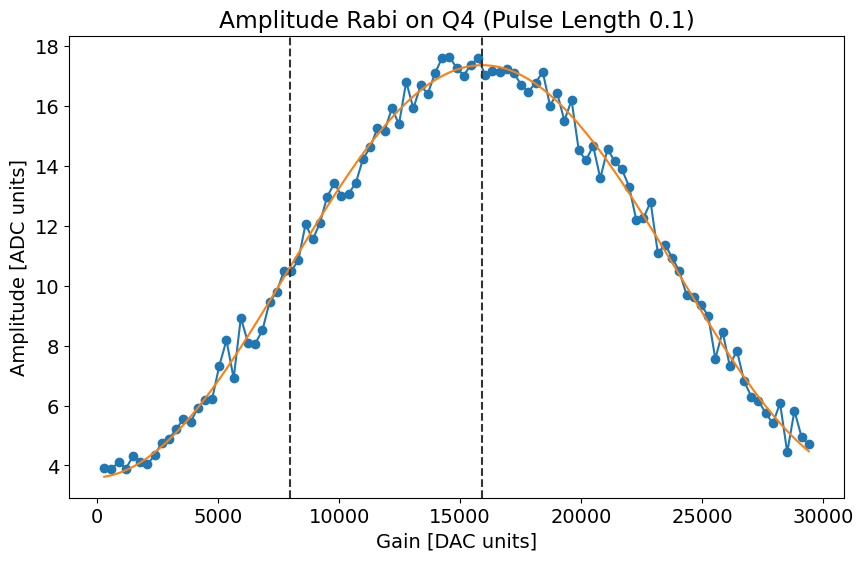

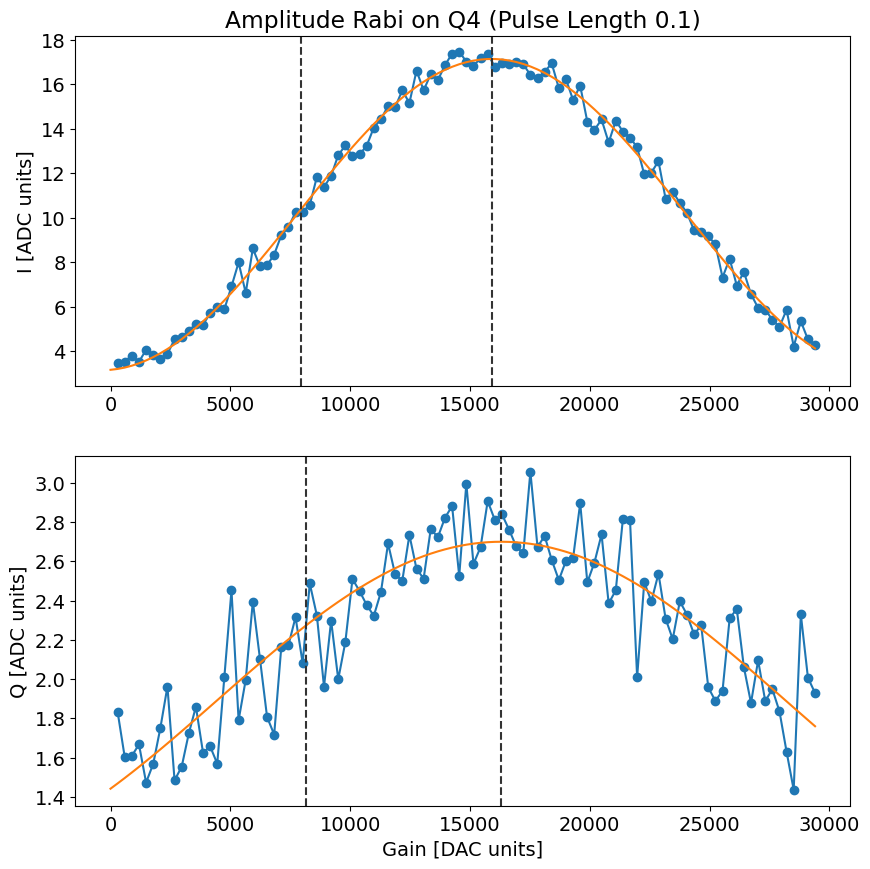

In [42]:
# Rabi ef
rabief=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, pulse_ge=True)
rabief.go(analyze=True, display=True, progress=True, save=True)


qTest sigma =  0.1
gauss


  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00001_amp_rabi_EF_qubit4.h5
Pi gain from amps data [dac units]: 16051
	Pi/2 gain from amps data [dac units]: 8025
Pi gain from avgi data [dac units]: 16050
	Pi/2 gain from avgi data [dac units]: 8025
Pi gain from avgq data [dac units]: 15950
	Pi/2 gain from avgq data [dac units]: 7975


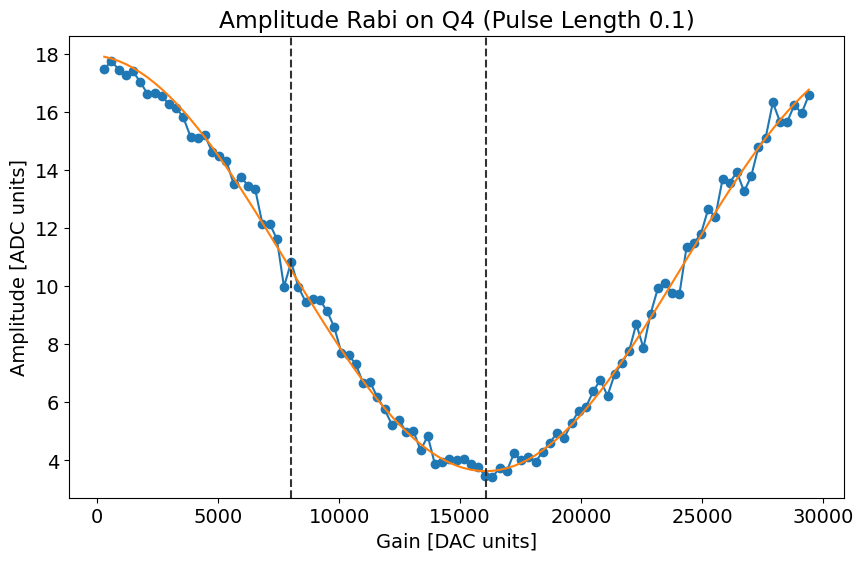

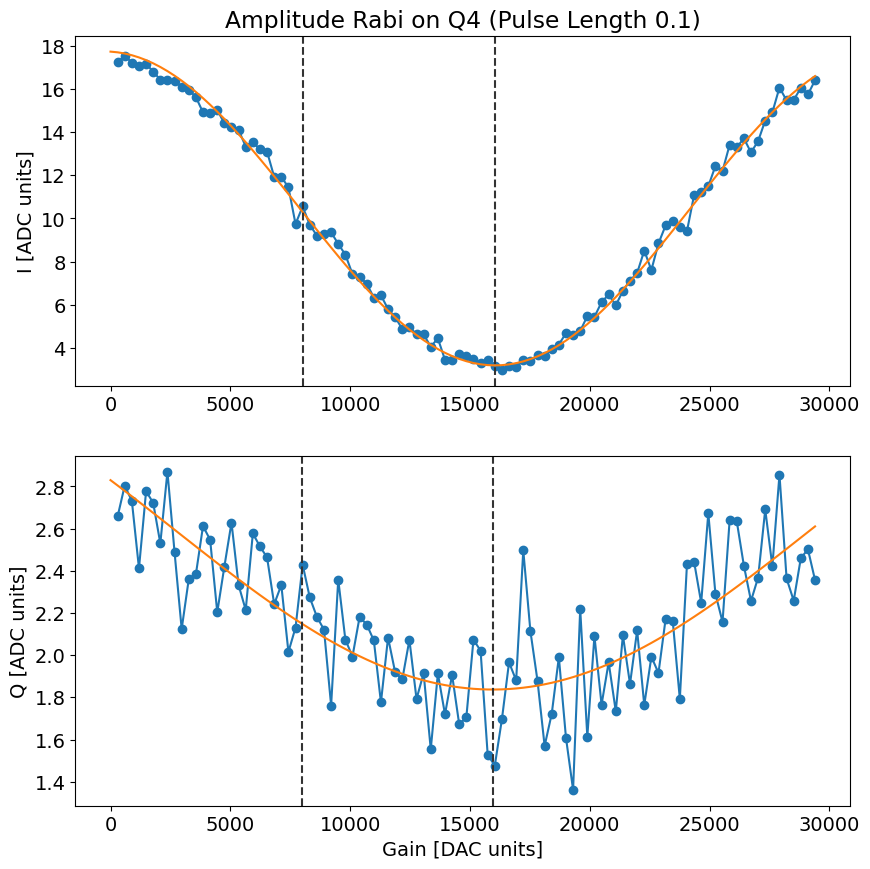

In [44]:


rabief=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, pulse_ge=False)
rabief.go(analyze=True, display=True, progress=True, save=True)
#auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ef','gain'), int(rabief.data['pi_length']), i)

## Continuous T1 for 2 Qubits

In [22]:
shotopt = meas.SingleShotOptExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"single_shot_opt_qubit{qubit_i}",
    config_file=results_config_path,
)

span_f = 1 # MHz don't need to span this much assuming that we already have a pretty good idea of the resonator frequency
npts_f = 5

span_gain = 0.07
# span_gain = 1000 
npts_gain = 2
# npts_gain = 50

span_len = 9 # us
npts_len = 3

shotopt.cfg.expt = dict(
    #reps=100000,
    reps = 10, 
    qubit=qubit_i,

    start_f=shotopt.cfg.device.readout.frequency[qubit_i] - 0.5*span_f,
    step_f=span_f/npts_f,
    expts_f=npts_f,
    start_gain=int(shotopt.cfg.device.readout.gain[qubit_i]-span_gain/2),
    step_gain=int(span_gain/npts_gain),
    expts_gain=npts_gain,

    start_len=3,
    step_len=span_len/npts_len,
    expts_len=npts_len,
    check_f = False,
)

shotopt.go(analyze=False, display=True, progress=True, save=False)

shotopt.analyze()
print(shotopt.data['fid'])

NameError: name 'results_config_path' is not defined